<font size="8">TO DO</font>
* convergence criterion in kmeans

* plot clusters distribution next to silhouette scores plot

* MATLAB artcile on silhouette score

- find the equivalent plotly plot for function plot_avg_silhouette_scores_vs_k_values()
make it interactive same as plot_wcss_k() function

- read sklearn examples n docs on clustering, especially kmeans
add scatter plot next to each silhouette value plot


# Clustering Case Study: Customer Segmentation with K-Means -  Tier 3
***
This case study is based on [this blog post](http://blog.yhat.com/posts/customer-segmentation-using-python.html) by the `yhat` blog. Please feel free to refer to the post for additional information, and solutions.

Structure of the mini-project:

1. **Sourcing and loading**
    * Load the data
    * Explore the data


2. **Cleaning, transforming and visualizing**
    * Data Wrangling: Exercise Set 1
        - Creating a matrix with a binary indicator for whether they responded to a given offer
        - Ensure that in doing so, NAN values are dealt with appropriately
    

3. **Modelling**
    * K-Means clustering: Exercise Sets 2 and 3
        - Choosing K: The Elbow method
        - Choosing K: The Silhouette method
        - Choosing K: The Gap statistic method
    
    * Visualizing clusters with PCA: Exercise Sets 4 and 5


4. **Conclusions and next steps**
    * Conclusions
    * Other clustering algorithms (Exercise Set 6)

# 0. Dependencies

In [64]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.cm as cm
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

In [65]:
# Turn off all warnings
warnings.filterwarnings("ignore")

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Functions

## <code><b>plot_distribution_of_data_points_within_clusters_for__optimal_k()</b></code>

In [67]:
def plot_distribution_of_data_points_within_clusters_for__optimal_k(
      cluster_labels
    , counts
  ):

  # Count the number of points in each cluster
  cluster_counts = np.bincount(
      cluster_labels
  )

  fig, ax = plt.subplots(
      figsize=(5, 6)
  )

  counts = np.bincount(
      counts
  )

  # Create a color palette for the bars
  colors = [
        'royalblue'
      , 'forestgreen'
      , 'tomato'
      , 'goldenrod'
      , 'mediumpurple'
  ]

  # Create the bar chart with customizations
  ax.bar(
        range(optimal_k)
      , counts
      , align     = 'center'
      , color     = colors
      , alpha     = 1
      , edgecolor = 'black'
      , linewidth = 1
      , width     = 0.5
  )

  ax.set_title(
        f'Distribution of data points in each\ncluster for the optimal $K$ ($K={optimal_k}$)'
      , fontsize = 14
      , pad      = 20
  )

  ax.set_xlabel(
        "Cluster label"
      , fontsize = 12
  )

  ax.set_ylabel(
        'Number of data points (cluster size)'
      , fontsize = 12
      , labelpad = 10
  )

  ax.set_xticks(
      range(optimal_k)
  )

  ax.tick_params(
        axis      = 'both'
      , which     = 'both'
      , labelsize = 12
  )

  # Add data labels above the bars
  for i, count in enumerate(counts):
      ax.text(
            i
          , count
          , str(count)
          , ha       ='center'
          , va       = 'bottom'
          , fontsize = 10
      )

  # Turn off grid lines using ax
  ax.grid(False)

  # Set border color and ticks outside the axes with a loop
  border_properties = ['top', 'right', 'bottom', 'left']
  for border in border_properties:
      ax.spines[border].set_color('black')
      ax.spines[border].set_linewidth(1)

  # Remove y-axis ticks
  ax.set_yticks([])

  # Ensure proper spacing and prevent label cutoff
  plt.tight_layout()

  plt.show()

## <code><b>plot_wcss_vs_k()</b></code>

In [68]:
def plot_wcss_vs_k(
      k_values
    , wcc_values
  ):

  # Create a figure using Plotly Express
  fig = px.line(
        x       = k_values
      , y       = wcc_values
      , markers = True
  )
  # ---------------------------------------------------------------------------
  #                       UPDATE TRACE PROPERTIES
  # ---------------------------------------------------------------------------
  # Update trace properties
  fig.update_traces(
        marker = dict(size=6, color='black', line=dict(width=1, color='black'))
      , line   = dict(color='black')
      , hovertemplate="K = %{x}<br>WCSS = %{y}"
  )
  # ---------------------------------------------------------------------------
  #                             UPDATE LAYOUT
  # ---------------------------------------------------------------------------
  xaxis_tickvals = list(k_values)
  yaxis_tickvals = list(wcc_values)

  axes_properties = dict(
        showgrid  = False
      , showline  = True
      , linewidth = 2
      , linecolor = 'black'
      , ticks     = 'outside'
      , tickvals  = xaxis_tickvals
  )

  fig.update_layout(
        title            = dict(text='Finding optimal number of clusters<br>using the <b>Elbow Method</b> metric', font=dict(color='black', size=24))
      , title_x          = 0.52
      , title_y          = 0.90
      , plot_bgcolor     = 'white'
      , paper_bgcolor    = 'white'
      , width            = 480
      , height           = 480
      , margin           = dict(l=50, r=50, t=100, b=50)
      , xaxis            = axes_properties
      , yaxis            = axes_properties
      , xaxis_title      = 'Number of clusters<br>(k)'
      , yaxis_title      = 'Within-Cluster Sum of Squares<br>(WCSS)'
      , xaxis_title_font = dict(size=16)
      , yaxis_title_font = dict(size=16)
      , xaxis_showgrid   = True
      , yaxis_showgrid   = True
      , xaxis_zeroline   = False
      , yaxis_zeroline   = False
      , xaxis_showline   = True
      , yaxis_showline   = True
      , xaxis_linecolor  = 'black'
      , yaxis_linecolor  = 'black'
  )
  # -----------------------------------------------------------------------------
  #                             UPDATE X-AXIS
  # -----------------------------------------------------------------------------
  # Update top and right axes line color and width
  fig.update_xaxes(
        linecolor = 'black'
      , linewidth = 2
      , mirror    = True
      , showgrid  = True
      , gridwidth = 1
      , gridcolor = 'lightgray'
  )
  # -----------------------------------------------------------------------------
  #                             UPDATE Y-AXIS
  # -----------------------------------------------------------------------------
  # Calculate the closest multiple of 25 to min_value and max_value
  y_min = 25 * np.floor(min(wcc_values) / 25)
  y_max = 25 * np.ceil(max(wcc_values) / 25)

  # Create an equally spaced list of numbers
  ticks = np.arange(
        y_min
      , y_max
      , 25
  )

  fig.update_yaxes(
        linecolor = 'black'
      , linewidth = 2
      , mirror    = True
      , tickvals  = ticks
      , showgrid  = True
      , gridwidth = 1
      , gridcolor = 'lightgray'
  )
  # -----------------------------------------------------------------------------
  fig.show()

## <code><b>calculate_avg_silhouette_scores_for_different_k_values()</b></code>

In [69]:
def calculate_avg_silhouette_scores_for_different_k_values(
      data_matrix
    , k_values
    ):

    avg_silhouette_scores = []

    for K in k_values:

        # Randomly, seed (initialize) 'K' clusters
        kmeans = KMeans(
              n_clusters   = K
            , random_state = 42
        )

        # Fit 'data matrix' to those clusters
        # Predict cluster labels for the same dataset 'data_matrix'
        cluster_labels = kmeans.fit_predict(
            data_matrix
        )

        # Compute the mean Silhouette Coefficient of all samples
        avg_silhouette_score = silhouette_score(
              data_matrix
            , cluster_labels
        )

        # Add the 'avg_silhouette_score' to 'avg_silhouette_scores'
        avg_silhouette_scores.append(
            avg_silhouette_score
        )

    return avg_silhouette_scores

## <code><b>plot_silhouette_scores_for_different_k_values()</b></code>

### 1. Using Matplotlib

In [70]:
# def plot_silhouette_scores_for_different_k_values(
#       k_values
#     , avg_silhouette_scores
#     , data_matrix
#     , figsize = (8, 6)
#   ):

#   # Aggregate the silhouette scores for samples belonging to cluster i
#   for K, avg_silhouette in zip(k_values, avg_silhouette_scores):

#     cluster_labels = KMeans(
#           n_clusters   = K
#         , random_state = 42
#     ).fit_predict(data_matrix)

#     sample_silhouette_values = silhouette_samples(
#           data_matrix
#         , cluster_labels
#     )

#     fig, ax = plt.subplots(
#         figsize = figsize
#     )

#     ax.set_title(
#           f"Silhouette Plot for k = {K}"
#         , fontsize = 24
#     )

#     ax.set_xlabel(
#           "Silhouette coefficient values"
#         , fontsize = 18
#         , labelpad = 16
#     )

#     ax.set_ylabel(
#           "Cluster label"
#         , fontsize = 18
#         , labelpad = 16
#     )
#     # -------------------------------------------------------------------------
#     # Initial y-coordinate for the text label
#     y_lower = 10

#     # Flag to check if there are samples in any cluster
#     cluster_has_samples = False

#     # Store average silhouette scores for each cluster label
#     avg_silhouettes = []

#     for i in range(K):

#         # Find the silhouette scores for all data points of 'i'-th cluster
#         ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

#         # Skip clusters with no samples (data points)
#         if ith_cluster_silhouette_values.size == 0:
#             continue

#         # Set the flag to True
#         cluster_has_samples = True

#         ith_cluster_silhouette_values.sort()

#         # Compute the new y_lower for the next plot (10 for the 0 samples)
#         size_cluster_i = ith_cluster_silhouette_values.shape[0]
#         y_upper        = y_lower + size_cluster_i

#         color = cm.nipy_spectral(
#             float(i) / K
#         )

#         ax.fill_betweenx(
#               np.arange(y_lower, y_upper)
#             , 0
#             , ith_cluster_silhouette_values
#             , facecolor = color
#             , edgecolor = color
#             , alpha     = 0.7
#         )

#         # Label the silhouette plots with their cluster numbers at the middle
#         ax.text(
#               -0.05
#             , y_lower + 0.5 * size_cluster_i
#             , str(i)
#             , fontsize = 20
#         )

#         # Display ith_cluster_silhouette_values and size next to the cluster number
#         ax.text(
#               0.62
#             , y_lower + 0.5 * size_cluster_i
#             , f'Avg. Silhouette score of all samples: {ith_cluster_silhouette_values.mean():.2f}\nCluster size: {size_cluster_i}'
#             , fontsize          = 10
#             , verticalalignment = 'center'
#             , color             = color
#         )

#         avg_silhouette_i = ith_cluster_silhouette_values.mean()
#         avg_silhouettes.append(avg_silhouette_i)

#         ax.axhline(y=avg_silhouette_i, color="black", linestyle="--", linewidth=1)

#         y_lower = y_upper + 10

#     # If no samples in any cluster, skip plotting for this k
#     if not cluster_has_samples:
#         plt.close()
#         continue
#     # -------------------------------------------------------------------------
#     #             AVG. SHILHOUETTE SCORE (BLACK DASHED LINE)
#     # -------------------------------------------------------------------------
#     # Add a vertical dashed line to display the average silhouette score
#     ax.axvline(
#           x         = avg_silhouette
#         , color     = "red"
#         , linestyle = "--"
#         , linewidth = 3
#     )
#     # -------------------------------------------------------------------------
#     #                              X-AXIS
#     # -------------------------------------------------------------------------
#     # ticks
#     x_ticks = [-0.1, 0, 0.2, 0.4, 0.6, avg_silhouette]

#     ax.set_xticks(
#         x_ticks
#     )

#     # labels
#     x_labels = [-0.1, 0, 0.2, 0.4, 0.6, f'{avg_silhouette:.3f}']

#     ax.set_xticklabels(
#       x_labels
#     , fontsize = 14
#     )

#     label_colors = ['black'] * (len(x_labels) - 1) + ['red']

#     for i, label in enumerate(ax.get_xticklabels()):
#         label.set_color(label_colors[i])

#     # limits
#     ax.set_xlim(
#         [-0.1, 0.6]
#     )
#     # -------------------------------------------------------------------------
#     #                              Y-AXIS
#     # -------------------------------------------------------------------------
#     # Clear the y-axis labels
#     ax.set_yticks(
#         []
#     )
#     # -------------------------------------------------------------------------
#     #                             BOTH AXES
#     # -------------------------------------------------------------------------
#     # ticks
#     ax.tick_params(
#           axis      = 'both'
#         , which     = 'both'
#         , labelsize = 12
#     )
#     # -------------------------------------------------------------------------
#     #                             GRIDLINES
#     # -------------------------------------------------------------------------
#     # only dipslay vertical gridlines
#     ax.grid(
#           True
#         , ls        = "-"
#         , linewidth = 1
#     )
#     # -------------------------------------------------------------------------
#     #                              BORDERS
#     # -------------------------------------------------------------------------
#     border_properties = ['top', 'right', 'bottom', 'left']
#     for border in border_properties:
#         ax.spines[border].set_color('black')
#         ax.spines[border].set_linewidth(1)
#     # -------------------------------------------------------------------------
#     plt.show()

### 2. Using Plotly</b>

In [71]:
def plot_silhouette_scores_for_different_k_values(k_values, data_matrix):

    """
    Plot silhouette scores for different values of K (number of clusters).

    Args:
        k_values (list): List of K values to evaluate.
        data_matrix (array-like): Input data matrix.

    Returns:
        None (displays the plot).
    """

    for K in k_values:
        # ---------------------------------------------------------------------
        #        Fit KMeans model and compute silhouette scores
        # ---------------------------------------------------------------------
        cluster_labels = KMeans(
              n_clusters   = K
            , random_state = 42
        ).fit_predict(data_matrix)

        sample_silhouette_values = silhouette_samples(
              data_matrix
            , cluster_labels
        )

        avg_silhouette = silhouette_score(
              data_matrix
            , cluster_labels
        )

        # ---------------------------------------------------------------------
        # Create a new Plotly figure
        fig = go.Figure()

        # Lower bound for the y-coordinate of the bars in the silhouette plot.
        y_lower             = 10

        traces              = []
        avg_silhouettes     = []
        cluster_has_samples = False

        for i in range(K):

            # Calculate silhouette score of each data point within the i-th cluster
            ith_cluster_silhouette_values  = sample_silhouette_values[cluster_labels == i]

            # Find total numebr of data points within the i-th cluster
            ith_cluster_num_of_data_points = ith_cluster_silhouette_values.size

            if ith_cluster_num_of_data_points == 0:
                continue

            cluster_has_samples = True

            # Sort the silhouette scores of i-th cluster for better visualization
            ith_cluster_silhouette_values.sort()

            # Calculate the average silhouette scores for the i-th cluster
            avg_silhouette_i = ith_cluster_silhouette_values.mean()

            avg_silhouettes.append(
                avg_silhouette_i
            )

            # Upper bound for the y-coordinate of the bars in the silhouette plot
            y_upper = y_lower + ith_cluster_num_of_data_points
            # =================================================================
            #           Add a trace for the i-th (current) cluster
            # =================================================================
            color = px\
                    .colors\
                    .qualitative\
                    .Plotly[i % len(px.colors.qualitative.Plotly)]

            trace = go.Bar(
                    y           = np.arange(y_lower, y_upper)
                  , x           = ith_cluster_silhouette_values
                  , orientation = 'h'
                  , marker      = dict(color=color, opacity=0.7)
                  , text        = [f'Sample: {j+1}<br>Silhouette score = {value:.3f}' for j, value in enumerate(ith_cluster_silhouette_values)]
                  , hovertemplate = '<b>%{text}</b>'
                  , name        = f'Cluster label {i+1}<br>No. of data points = {ith_cluster_num_of_data_points}<br>Avg. Silhouette score = {avg_silhouette_i:.3f}<br>'
            )

            # Append the trace to the list
            traces.append(trace)

            # =================================================================
            #     Add a line for the avg silhouette score for each cluster
            # =================================================================
            fig.add_shape(
                go.layout.Shape(
                      type = "line"
                    , x0   = 0
                    , x1   = avg_silhouette_i
                    , y0   = y_lower + 0.5 * ith_cluster_num_of_data_points
                    , y1   = y_lower + 0.5 * ith_cluster_num_of_data_points
                    , line = dict(color="black", width=1, dash="solid")
                )
            )
            # =================================================================
            y_lower = y_upper + 10
        # ---------------------------------------------------------------------
        # Add the traces in reverse order (from bottom to top). With this
        # modification, the trace names will be added from bottom to
        # top, matching the order of the clusters displayed in the plot.
        for trace in reversed(traces):
            fig.add_trace(trace)
        # ---------------------------------------------------------------------
        if not cluster_has_samples:
            continue

        # Add a dashed line for the average silhouette score
        fig.add_shape(
            go.layout.Shape(
                  type = "line"
                , x0   = avg_silhouette
                , x1   = avg_silhouette
                , y0   = 0
                , y1   = y_lower
                , line = dict(color="red", width=3, dash="dash")
            )
        )
        # ---------------------------------------------------------------------
        #                   Update X-axis properties
        # ---------------------------------------------------------------------
        fig.update_xaxes(
              linecolor      = 'black'
            , linewidth      = 2
            , mirror         = True
            , showgrid       = True
            , gridwidth      = 1
            , gridcolor      = 'lightgray'
            , tickvals       = [-0.1, 0, 0.2, 0.4, 0.6, avg_silhouette]
            , ticktext       = [-0.1, 0, 0.2, 0.4, 0.6, f'<span style="color:red">{avg_silhouette:.3f}</span>']
            , title_font     = dict(size=14)
            , title_standoff = 10
            , tickangle      = 0
        )
        # ---------------------------------------------------------------------
        #                   Update Y-axis properties
        # ---------------------------------------------------------------------
        fig.update_yaxes(
              linecolor = 'black'
            , tickvals  = []
            , linewidth = 2
            , mirror    = True
            , showgrid  = False
            , gridwidth = 1
            , gridcolor = 'lightgray'
        )
        # ---------------------------------------------------------------------
        #                   Update overall plot layout
        # ---------------------------------------------------------------------
        fig.update_layout(
              title            = dict(text=f'Silhouette Plot for <b>k = {K}</b><br><span style="color:red">Avg. Silhouette score = {avg_silhouette:.3f}</span>', font=dict(color='black', size=24))
            , title_x          = 0.40
            , title_y          = 0.95
            , plot_bgcolor     = 'white'
            , paper_bgcolor    = 'white'
            , width            = 960
            , height           = 960
            , margin           = dict(l=50, r=50, t=100, b=50)
            # , xaxis            = axes_properties
            # , yaxis            = axes_properties
            , xaxis_title      = 'Silhouette score (S)'
            , yaxis_title      = 'Cluster labels'
            , xaxis_title_font = dict(size=16)
            , yaxis_title_font = dict(size=16)
            , xaxis_showgrid   = True
            , yaxis_showgrid   = False
            , xaxis_zeroline   = False
            , yaxis_zeroline   = False
            , xaxis_showline   = True
            , yaxis_showline   = True
            , xaxis_linecolor  = 'black'
            , yaxis_linecolor  = 'black'
            # , xaxis_showspikes = False
            # , yaxis_showspikes = False
        )
        # ---------------------------------------------------------------------
        fig.show()

## <code><b>plot_avg_silhouette_scores_vs_k_values()</b></code>

In [72]:
def plot_avg_silhouette_scores_vs_k_values(
      k_values
    , avg_silhouette_scores
    , figsize=(480, 480)
    ):

    fig = px.line(
          x       = k_values
        , y       = avg_silhouette_scores
        , labels  = {"x": "Number of clusters\n(K)", "y": "Average\nSilhouette Score\n(S)"}
        , markers = True
    )

    # ---------------------------------------------------------------------------
    #                       UPDATE TRACE PROPERTIES
    # ---------------------------------------------------------------------------
    # Update trace properties
    fig.update_traces(
          marker = dict(size=6, color='black', line=dict(width=1, color='black'))
        , line   = dict(color='black')
        , hovertemplate="K = %{x}<br>S = %{y:.3f}"
    )
    # -------------------------------------------------------------------------
    fig.update_layout(
        title             = dict(
                text = 'Finding optimal number of clusters<br>using the <b>Silhouette</b> metric'
              , font = dict(color='black', size=24)
          )
        , title_x          = 0.52
        , title_y          = 0.90
        , plot_bgcolor     = 'white'
        , paper_bgcolor    = 'white'
        , width            = figsize[0]
        , height           = figsize[1]
        , margin           = dict(l=50, r=50, t=100, b=50)
        , xaxis            = dict(tickvals=list(k_values))
        # , yaxis            = dict(tickvals=list(y_ticks))
        , xaxis_title      = 'Number of clusters<br>(k)</br>'
        , yaxis_title      = 'Avg. Silhouette score <br>(S)</br>'
        , xaxis_title_font = dict(size=16)
        , yaxis_title_font = dict(size=16)
        , xaxis_showgrid   = True
        , yaxis_showgrid   = True
        , xaxis_zeroline   = False
        , yaxis_zeroline   = False
        , xaxis_showline   = True
        , yaxis_showline   = True
        , xaxis_linecolor  = 'black'
        , yaxis_linecolor  = 'black'
    )
    # -------------------------------------------------------------------------
    #                             UPDATE X-AXIS
    # -------------------------------------------------------------------------
    # Update top and right axes line color and width
    fig.update_xaxes(
          linecolor = 'black'
        , linewidth = 2
        , mirror    = True
        , showgrid  = True
        , gridwidth = 1
        , gridcolor = 'lightgray'
    )
    # -------------------------------------------------------------------------
    #                             UPDATE Y-AXIS
    # -------------------------------------------------------------------------
    # Calculate the closest multiple of 25 to min_value and max_value
    y_min = 10 * np.floor(min(avg_silhouette_scores) / 10)
    y_max = 10 * np.ceil(max(avg_silhouette_scores) / 10)

    # Create an equally spaced list of numbers
    y_ticks = np.arange(
          y_min
        , y_max
        , 10
    )

    y_tick_text = [
        f"{val / 100:.2f}"
        for val
        in y_ticks
    ]

    fig.update_yaxes(
          linecolor = 'black'
        , linewidth = 2
        , mirror    = True
        , showgrid  = True
        , gridwidth = 1
        , gridcolor = 'lightgray'
        , tickvals  = y_ticks
        , ticktext  = y_tick_text
    )
    # -------------------------------------------------------------------------
    fig.show()

In [73]:
# def plot_avg_silhouette_scores_vs_k_values(
#       k_values
#     , avg_silhouette_scores
#     , figsize = (5, 3)
# ):

#   fig, ax = plt.subplots(
#       figsize = figsize
#   )

#   plt.plot(
#         k_values
#       , avg_silhouette_scores
#       , color     = "black"
#       , linewidth = 2
#   )
#   # ---------------------------------------------------------------------------
#   #                                AXES
#   # ---------------------------------------------------------------------------
#   ax.set_title(
#         r"Finding optimal number of clusters using $\textbf{Silhouette Analysis}$"
#       , fontsize = 18
#   )

#   ax.set_xlabel(
#         "Number of clusters\n$(K)$"
#       , fontsize = 12
#       , labelpad = 12
#   )

#   ax.set_ylabel(
#         "Average\nSilhouette Score\n(S)"
#       , fontsize = 12
#       , labelpad = 12
#   )

#   ax.tick_params(
#         axis      = 'both'
#       , which     = 'both'
#       , labelsize = 12

#   )

#   # Set x-tick values to be the same as k_values
#   ax.set_xticks(
#         k_values
#   )

#   # Set y-tick values to be the same as k_values
#   ax.set_yticks(
#         np.linspace(
#               np.floor((min(avg_silhouette_scores) * 100 - 1)) / 100
#             , np.ceil(( max(avg_silhouette_scores) * 100 + 1)) / 100
#             , 8
#         )
#   )
#   # ---------------------------------------------------------------------------
#   #                              GRIDLINES
#   # ---------------------------------------------------------------------------
#   # Turn off grid lines
#   ax.grid(
#         True
#       , ls        = "-"
#       , linewidth = 0.5
#   )
#   # ---------------------------------------------------------------------------
#   #                              BORDERS
#   # ---------------------------------------------------------------------------
#   # Set border color and ticks outside the axes with a loop
#   border_properties = ['top', 'right', 'bottom', 'left']
#   for border in border_properties:
#       ax.spines[border].set_color('black')
#       ax.spines[border].set_linewidth(1)
#   # -------------------------------------------------------------------------
#   plt.show()

## <code><b>plot_clustering_algorithm()</b></code>

In [207]:
def plot_clustering_algorithm(model, name):
    results = model.fit_predict(
        model_pca_results\
        .components_\
        .transpose()
    )

    plt.scatter(
          x    = model_pca_results.components_[0]
        , y    = model_pca_results.components_[1]
        , c    = results
        , cmap = 'tab10'
    )

    plt.xlabel('PCA Component x')
    plt.ylabel('PCA Component y')
    plt.title(f'{name}')
    plt.show()

# 1. Sourcing and loading

## 1.1. Load
The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

## 1.2. EDA

In [74]:
file_path_to_dataset = "/content/drive/MyDrive/Colab Notebooks/data/15.6.WineKMC.xlsx"

### 1.2.1. <code><b>df_offers</b></code>

The first dataset in the first sheet (<code><b>sheet_name=0</b></code>) contains information about each <b>offer</b> such as the <b>month</b> it is in effect and several attributes about the wine that the offer refers to: the <b>variety</b>, <b>minimum quantity</b>, <b>discount</b>, <b>country of origin</b> and <b>whether or not it is past peak</b>.

In [75]:
df_offers = pd.read_excel(
      file_path_to_dataset
    , sheet_name = 0
)

df_offers.head()

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [76]:
# Rename columns of "df_offers"
df_offers.columns = [
      "offer_id"
    , "campaign"
    , "varietal"
    , "min_qty"
    , "discount"
    , "origin"
    , "past_peak"
]

df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


### 1.2.2. <code><b>df_transactions</b></code>

The second dataset in the second worksheet (<code><b>sheet_name=1</b></code>) contains <b>transactional data</b> -- which <b>offer</b> (i.e., <code><b>offer_id</b></code>) each customer responded to.

In [77]:
df_transactions = pd.read_excel(
      file_path_to_dataset
    , sheet_name = 1
)

df_transactions.head()

,Customer Last Name,Offer #
0,Smith,2
1,Smith,24
2,Johnson,17
3,Johnson,24
4,Johnson,26


In [78]:
# Rename columns of "df_transactions"
df_transactions.columns = [
      "customer_name"
    , "offer_id"
]

df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


> <b>NOTE:</b> Adding a column labeled <code><b>n</b></code> with all values set to <code><b>1</b></code> is a common technique used in data preparation when we plan to use <code><b>pd.pivot_table</b></code> or similar operations later. This column essentially acts as a placeholder to help us perform certain aggregations or counting operations when we pivot the table.

In [79]:
print(f"range of column offer_id: ({df_transactions['offer_id'].min()}, {df_transactions['offer_id'].max()})")

range of column offer_id: (1, 32)


# 2. Cleaning, transforming and visualizing

## 2.1. Data Wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer.

---

### <font color="#FF333F" size="6">$\textbf{I}$ Exercise</font>

Create a dataframe where each row has the following columns (Use the pandas <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html"><code><b>pd.merge</b></code></a> and <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html"><code><b>pd.pivot_table</b></code></a> functions for this purpose):

* <code><b>customer_name</b></code>

* One column for each offer, with a <code><b>1</b></code> if the customer responded to the offer.

  ✔ Make sure you also deal with any weird values such as <code><b>NaN</b></code>. Read the documentation to develop your solution.


In [80]:
# Merge the two DataFrames on the 'offer_id' column
merged_df = pd.merge(
      df_transactions
    , df_offers
    , on  = 'offer_id'
    , how = 'left'
)

merged_df

,customer_name,offer_id,n,campaign,varietal,min_qty,discount,origin,past_peak
0,Smith,2,1,January,Pinot Noir,72,17,France,False
1,Smith,24,1,September,Pinot Noir,6,34,Italy,False
2,Johnson,17,1,July,Pinot Noir,12,47,Germany,False
3,Johnson,24,1,September,Pinot Noir,6,34,Italy,False
4,Johnson,26,1,October,Pinot Noir,144,83,Australia,False
...,...,...,...,...,...,...,...,...,...
319,Fisher,11,1,May,Champagne,72,85,France,False
320,Fisher,22,1,August,Champagne,72,63,France,False
321,Fisher,28,1,November,Cabernet Sauvignon,12,56,France,True
322,Fisher,30,1,December,Malbec,6,54,France,False


#### $\small\textbf{1.}$ <b><font size="4">Pivot the Table</b></font>

  The <a href="https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html"><code><b>pd.pivot_table</b></code></a> function is used to pivot the <code><b>merged_df</b></code> DataFrame. This operation rearranges the data to have:
  * <code><b>customer_name</b></code> as the index.
  * <code><b>offer_id</b></code> as the columns.
  * The values in the <code><b>n</b></code> column.

  Further, the operation fills missing values with zeros using the <code><b>fill_value=0</b></code> argument.

In [81]:
# Pivot the table to create the desired format
pivot_table = pd.pivot_table(
      merged_df
    , values     = 'n'
    , index      = 'customer_name'
    , columns    = 'offer_id'
    , fill_value = 0
)

pivot_table

offer_id,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
Anderson,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Williams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Wilson,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
Wood,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


As can be seen, we have a DataFrame where:
  * Each row represents a customer.
  * Each column represents an offer.
  * Cells contain the number of responses (or zero if the customer didn't respond).

Now, let's check the first row of the table above for the customer with last name <b>Adams</b>.

In [82]:
pivot_table.iloc[0]

offer_id
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    1
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    1
30    1
31    0
32    0
Name: Adams, dtype: int64

We can see that the customer has responded to <code><b>offer_id</b></code> <code><b>18</b></code>  , <code><b>29</b></code> , and <code><b>30</b></code> .

In [83]:
columns_with_value_1 = pivot_table.columns[pivot_table.iloc[0] == 1]
columns_with_value_1

Int64Index([18, 29, 30], dtype='int64', name='offer_id')

#### $\small\textbf{2.}$  <b><font size="4">Reset the Index</b></font>
  
  The <code><b>pivot_table</b></code> is modified in place (using <code><b>inplace=True</b></code>) to reset the index. This action changes the <code><b>customer_name</b></code> from an index to a regular column, and the DataFrame is updated accordingly.

In [84]:
# Reset the index to have 'customer_name' as a regular column
pivot_table.reset_index(
    inplace = True
)

pivot_table

offer_id,customer_name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,Allen,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,Anderson,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,Bailey,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Baker,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Williams,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
96,Wilson,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
97,Wood,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
98,Wright,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### $\small\textbf{3.}$ <b><font size="4">Rename Columns</b></font>

  Finally, rename the columns of the DataFrame to make them more informative by adding a prefix <code><b>offer_</b></code> to each <code><b>offer_id</b></code> column, indicating that these columns represent customer responses to offers.

In [85]:
# Rename the columns to indicate whether the customer responded to each offer (i.e., "offer_id")
pivot_table.columns = ['customer_name'] + [f'offer_{offer_id}' for offer_id in pivot_table.columns if offer_id != 'customer_name']

pivot_table

,customer_name,offer_1,offer_2,offer_3,offer_4,offer_5,offer_6,offer_7,offer_8,offer_9,...,offer_23,offer_24,offer_25,offer_26,offer_27,offer_28,offer_29,offer_30,offer_31,offer_32
0,Adams,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,Allen,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,Anderson,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,Bailey,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Baker,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Williams,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
96,Wilson,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
97,Wood,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
98,Wright,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


---

# 3. Metrics for determining optimal number of clusters $k_{optimal}$

Recall that in $\small\textbf{K-Means Clustering}$ we want to:
  
  * <font size="4"><b>Minimizing <font color="DC143C">Within-</font>Cluster Variance (Distortion):</b></font>
  
    * One of the primary objectives in clustering is to minimize the within-cluster $\small\textbf{variance}$ or $\small\textbf{distortion}$ .
    
    * This means that data points within the same cluster should be as close to each other as possible. In other words, we want to minimize the dispersion or spread of data points within each cluster.
    
    * This aspect is often associated with $\small\textbf{compactness}$ or $\small\textbf{cohesion}$ within clusters.
  
  <br>
  
  * <font size="4"><b>Maximizing <font color="DC143C">Between-</font>Cluster Separation (Distance):</b></font>
  
    * Simultaneously, clustering aims to maximize the $\small\textbf{distance}$ or $\small\textbf{dissimilarity}$ between different clusters.
    
    * This means that data points from different clusters should be as far apart as possible.
    
    * This aspect is often associated with $\small\textbf{separation}$ or $\small\textbf{dissimilarity}$ between clusters.

<br>
<br>  
True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters $k$. We will introduce three methods:
  1. The $\small\textbf{Elbow method}$
  2. The $\small\textbf{Silhouette Analysis}$
  3. The $\small\textbf{Gap Statistic}$

## 3.1. Elbow Method

The first method looks at the $\small\textbf{Within-Cluster Sum of Squares}$ ($WCSS$) error in each cluster $C_k$ , against number of clusters $k$. We compute the distance from each data point $x_i$ to the center of the cluster (centroid) $\mu_k$ to which the data point was assigned.

\begin{align}
\Large
WCSS
&=
\Large
\sum\limits_k \sum\limits_{x_i \in C_k} \sum\limits_{x_j \in C_k} \left( x_i - x_j \right)^2 \tag{1-I}\\\\
&=
\Large
\sum_k \sum\limits_{x_i \in C_k} \left( x_i - \mu_k \right)^2
\tag{1-II}
\end{align}

where $\mu_k$ is the centroid of cluster $C_k$ and it is calculated as follows:

\begin{align}
\Large
\mu_k = \frac{1}{\lvert\lvert C_k \rvert\rvert}\sum\limits_{i=1}^{\lvert\lvert C_k \rvert\rvert} x_i
\tag{1-III}
\end{align}

\begin{align}
\end{align}
<table>
  <tr>
    <th>Param/Term</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>$WCSS$</td>
    <td>
    The within-cluster sum of squares
    <br>
    <li> <i>AKA</i> cluster intertia, Within Cluster Distortion (WCD), Sum of Squared Errors (SSE), Sum of Squares (SS)
      </li>
    </li>
    </td>
  </tr>
  <tr>
    <td>$\large x_i$</td>
    <td>Coordinates of a point in cluster $\large C_k$</td>
  </tr>
  <tr>
    <td>$\large x_j$</td>
    <td>Coordinates of another point in cluster $\large C_k$</td>
  </tr>
  <tr>
    <td>$\large (x_i-x_j)^2$</td>
    <td>Squared Euclidean distance between data points $\large x_i$ and $\large x_j$ within cluster $\large C_k$.<br>(It measures how far apart these two data points are within the same cluster).</td>
  </tr>
  <tr>
    <td>$\large \mu_k$</td>
    <td>
    Centroid of cluster $\large C_k$
    <br>
    <li>It is the mean of the coordinates of all data points $\large x_i$ within that cluster.
    <br>
    <li> If we have $\large k$ cluster, then we will have $\large k$ centroids.
    </td>
  </tr>
  <tr>
    <td>$\large C_k$</td>
    <td>$\large k$-th cluster</td>
  </tr>
  <tr>
    <td>$\large \lvert\lvert C_k \rvert\rvert$</td>
    <td>Size of (number of data points in) cluster $\large C_k$</td>
  </tr>
  <tr>
    <td>$\large \sum\limits_{x_i}\in C_k$</td>
    <td>Sum over all data points $\large x_i$ that belong to cluster $\large C_k$ .</td>
  </tr>
  <tr>
    <td>$\large \sum\limits_{x_j}\in C_k$</td>
    <td>Another summation, but it represents the sum over all <br>data points $\large x_j$ within the same cluster $\large C_k$ .</td>
  </tr>
  <tr>
    <td>$\large \sum\limits_{k}$</td>
    <td>Summing over all clusters, denoted by the index $\large k$ .</td>
  </tr>
</table>

Now, let's simplify formulas above:

* $\small\textbf {Equation 1-I}$ calculates the sum of squared distances between all pairs of data points  within the same cluster $C_k$. Essentially, it :
  
  * Sums up the distances between <b>every pair of data points</b> in each cluster $C_k$, i.e., $\large\sum\limits_{x_i \in C_k} \sum\limits_{x_j \in C_k} \left( x_i - x_j \right)^2$ .
  
  * Then, sums these values across all $k$ clusters, i.e., $\large\sum\limits_k$ .

* $\small\textbf {Equation 1-II}$ <b>simplifies</b> $\small\textbf {Equation 1-I}$. Instead of summing the distances between every pair of data points within a cluster, it:
  
  * Calculates the squared distance between <b>each data point $x_i$ and the centroid $\mu_k$</b> of each cluster $C_k$ , i.e., $\left( x_i - \mu_k \right)^2$ .
  
  * Then, sums these squared distances for all data points in that cluster, i.e., $\large\sum\limits_{x_i \in C_k}$ .
  
  * Finally, sums these values across all $k$ clusters, i.e., $\large\sum\limits_k$ .

> <b>NOTE:</b> The $\small\textbf{Equation 1.II}$ is a more <b>computationally efficient</b> way of calculating $\small{WCSS}$, the within-cluster sum of squares. It's based on the fact that, in K-means clustering, the centroid $\mu_k$ is the point that minimizes the sum of squared distances to all data points within the same cluster $ C_k$. So, rather than summing up the distances between all pairs of data points, we can calculate the squared distance from each data point to its cluster centroid and then sum these squared distances for all data points in the cluster to get the same result.

We can plot $WCSS$ vs. $k$ and choose the $\small\textbf{Elbow Point}$ in the plot as the optimal (best) value for $k$.

> <b>NOTE:</b> The $\small\textbf{Elbow Point}$ is the point on the plot where the $WCSS$ starts to level off or decrease more slowly after a significant drop (i.e., where $k$ starts to decrease at a slower rate). It resembles an elbow in the plot. The $\small\textbf{Elbow Method}$ is discussed in part 2 of the Harvard Clustering lecture.

---

### <font color="#FF333F" size="6">$\textbf{II}$ Exercise</font>

#### $\small\textbf{1.}$ Features

Create a numpy matrix <code><b>x_cols</b></code> with only the columns representing the <code><b>offers_i</b></code> columns.

In [86]:
x_cols = np.array(merged_df.iloc[:, 2:])

# Define a function to format the numpy array
def pretty_print_numpy_array(arr):
    for row in arr:
        print(' '.join(f'{val:2}' for val in row))

# Call the function and print the first 5 rows
pretty_print_numpy_array(x_cols[:5])

 1 January Pinot Noir 72 17 France  0
 1 September Pinot Noir  6 34 Italy  0
 1 July Pinot Noir 12 47 Germany  0
 1 September Pinot Noir  6 34 Italy  0
 1 October Pinot Noir 144 83 Australia  0


#### $\small\textbf{2.}$ Build

Write code that applies the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix.

In [159]:
# Define a range of number of clusters to test
k_values = range(2, 11)

# Initialize an empty list to store the WCSS values for different values of K
wcss_values = []

# Initialize an empty dictionary to store cluster assignments for each K
cluster_assignments = {}

# Initialize a variable to store the previous WCSS value
previous_wcss_tot_for_current_k = None

# Create a DataFrame to store cluster information
cluster_info_df = pd.DataFrame()

# 1. Identify the numeric columns in the 'pivot_table'
# 2. Convert the DataFrame 'pivot_table' into a NumPy array
data_matrix = pivot_table\
              .select_dtypes(include=['number'])\
              .to_numpy()

data_matrix

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 1]])

In [88]:
# Iterate over K values
for k in k_values:

    # Build a K-Means clustering model from scikit-learn with n_clusters
    # set to the current value of K.
    kmeans_model = KMeans(
          n_clusters   = k
        , random_state = 0
    )

    # Fit the kmeans model to the data X and assign each data point to a cluster.
    cluster_labels = kmeans_model.fit_predict(
        data_matrix
    )

    # Find the cluster centers (centroids) for each cluster in kmeans
    cluster_centers = kmeans_model.cluster_centers_

    # Calculate the WCSS for current K
    wcss_each_cluster = (data_matrix - cluster_centers[cluster_labels]) ** 2

    wcss_tot_for_current_k = np.sum(
        wcss_each_cluster
    )

    wcss_values.append(
        wcss_tot_for_current_k
    )

    # Store cluster assignments
    cluster_assignments[str(k)] = cluster_labels

    # Create a DataFrame to store cluster information
    cluster_df = pd.DataFrame({
          'Cluster ID'         : range(k)
        , '# of points (size)' : np.bincount(cluster_labels)
        , 'WCSS'               : wcss_tot_for_current_k
    })

    # Print cluster information for the current K value
    print(f"Cluster Information for K={k}:")
    print(cluster_df[['Cluster ID', '# of points (size)']].to_string(index=False))

    # Print SS value
    if previous_wcss_tot_for_current_k is None\
    or wcss_tot_for_current_k != previous_wcss_tot_for_current_k:
        print(f"WCSS = {round(wcss_tot_for_current_k, 2)}\n")

    # Update previous_ss with the current SS value
    previous_wcss_tot_for_current_k = wcss_tot_for_current_k
    print("="*40 + "\n")

Cluster Information for K=2:
 Cluster ID  # of points (size)
          0                  63
          1                  37
WCSS = 251.46


Cluster Information for K=3:
 Cluster ID  # of points (size)
          0                  48
          1                  16
          2                  36
WCSS = 227.62


Cluster Information for K=4:
 Cluster ID  # of points (size)
          0                  28
          1                  41
          2                  16
          3                  15
WCSS = 215.14


Cluster Information for K=5:
 Cluster ID  # of points (size)
          0                  22
          1                  16
          2                  43
          3                  14
          4                   5
WCSS = 205.18


Cluster Information for K=6:
 Cluster ID  # of points (size)
          0                  11
          1                  27
          2                  15
          3                  16
          4                  17
          5            

#### $\small\textbf{3.}$ Visualize

##### $WCSS$ vs. $k$

Construct a plot showing $WCSS$ for each $k$ and pick the optimal $k$ , using this plot. For simplicity, test $2 \le k \le 10$. This plot is also know as $\small\textbf{intertia plot}$.

In [89]:
plot_wcss_vs_k(
      k_values
    , wcss_values
)

<b>What values of $WCSS$ do you believe represent better clusterings? Why?</b>

* As we increase the number of clusters $k$ , the $WCSS$ tends to decrease.
  
  * This is expected because with more clusters, the data points can be assigned to clusters that are closer to their actual positions, resulting in smaller within-cluster variances.
  
  * However, it's important to strike a balance between having enough number of clusters $k$ to :
    
    * Capture meaningful patterns in the data (e.g., to find cancerous and non-cancerous cells, it is not meaningful to consider 10 cluster!!).
    
    * Avoiding overfitting, which can lead to too many clusters and reduced interpretability.

* Typically, there is no fixed "optimal/best" value of $k$ , as it depends on the specific problem and goals of our analysis.
  
  * We can use techniques such as the $\small\textbf{Elbow Method}$ or $\small\textbf{Silhouette Analysis}$ to determine an appropriate number of clusters $k$ .
  
  * The elbow method involves plotting the $WCSS$ values for different values of $k$ and looking for an $\small\textbf{Elbow Point}$ where the rate of decrease in $WCSS$ starts to slow down.
  
  * This point can be a good indicator of the $\small\textbf{optimal}$ $k$ for our data.

* In this case study, it appears that the rate of decrease in $WCSS$ starts to slow down around $k=4$ or $5$ . So, we might consider these values as representing better clusterings, as they strike a reasonable balance between <b>compactness/distortion (small $WCSS$)</b> and <b>interpretability</b>.

##### Distribution of data points within each cluster for $k_{optimal}$

Make a bar chart showing the number of points in (size of) each cluster for k-means under the optimal (best) $k$. Remember, per assumption above, the optimal number of clusters is $k=5$ .

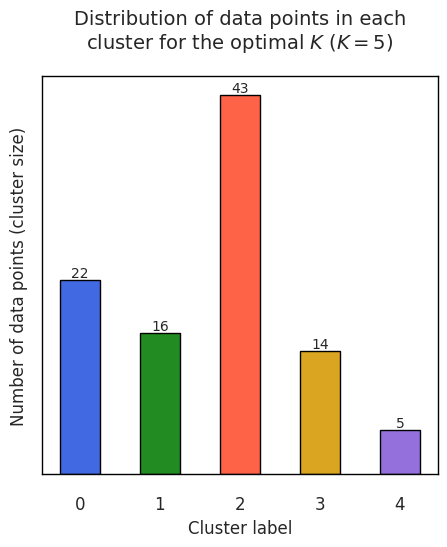

In [90]:
# Heuristically, based on the WCSS results, we assume the optimal K is 5
optimal_k = 5

plot_distribution_of_data_points_within_clusters_for__optimal_k(
      cluster_labels
    , cluster_assignments[str(optimal_k)]
)

#### $\small\textbf{4.}$ Conclusions

* From the figure above, we can realize that the distribution of data points across clusters is somewhat imbalanced.

  * Cluster 2 is the largest with 43 data points, while Cluster 4 is the smallest with only 5 data points.
  
  * The imbalance can be an important consideration, as it indicates that some clusters capture more prevalent patterns in the data, while others represent less common patterns.

* Cluster 4 might indicate rare or outlier patterns in the data as it contains less data points compared to the other clusters.

<b>What challenges did you experience using the Elbow method to pick $k$?</b>

The $\small\textbf{Elbow Method}$ is a <b>heuristic</b> technique used to determine the optimal number of clusters $k$ in a K-means clustering algorithm. While it is a valuable tool for selecting an appropriate number of clusters, it does come with some challenges and limitations:

  > <font color="darkgrey"> <i>A <b>heuristic</b> refers to a practical rule or technique that is used to solve a problem or make a decision, often based on experience and <b>intuition rather than strict mathematical or algorithmic reasoning.</b></i></font>

  1. <b>Subjectivity:</b> The choice of the $\small\textbf{Elbow Point}$ on the graph is somewhat subjective and depends on visual interpretation. Different individuals may choose different points as the optimal $k$ based on the same graph.

  2. <b>Ambiguity:</b> The Elbow method produced ambiguous results in our case, where there is no clear $\small\textbf{Elbow}$ in the plot, making it challenging to determine the optimal $k$.

  3. <b>Overfitting vs. Underfitting:</b> Selecting too few clusters (underfitting) or too many clusters (overfitting) can both have negative consequences. This approach may not always provide a clear trade-off between these two extremes.

> <b>NOTE:</b> To address some of these challenges, it's often recommended to use multiple methods for determining the optimal number of clusters $k$ , such as $\small\textbf{Silhouette Analysis}$, $\small\textbf{Gap Statistics}$, or domain knowledge, in addition to $\small\textbf{Elbow Method}$. This helps in making a more informed decision about the appropriate $k$ for a given dataset.


---

## 3.2. Silhouette Analysis

There exists another method that measures:
  1. How well each datapoint $x_i$ "fits" its assigned cluster.
  2. How poorly it fits into other clusters.
  
This is a different way of looking at the same objective.

### 3.2.1. <b>Single point</b>

The $\small\textbf{silhouette score}$ $s(i)$ for a single data point $i$ within a cluster is defined as:
<br>

\begin{align}
\large
s(i) = \frac{b(i) - a(i)}{\max{ \left\{ b(i), a(i) \right\}}}
\tag{2}
\end{align}

\begin{align}
\end{align}
<table>
  <tr>
    <th><font size="3">Parameter/Term</th>
    <th><font size="3">Description</th>
  </tr>
  <tr>
    <td>$\large {i}$</td>
    <td><b>A specific data point within a cluster $\large C_k$</b></td>
  </tr>
  <! ------------------------------------------------------- >
  <!                          a(i)                           >
  <! ------------------------------------------------------- >
  <tr>
    <td>$\large {a_{i}}$</td>
    <td>
    <b>Average distance from $\large i$ to all other points <font color="DC143C">within</font> its own cluster $\large C_k$</b>
    <br>
    <li> <i>AKA</i> the mean <font color="DC143C">intra-</font>cluster distance or <font color="DC143C">intra-</font>cluster similarity.
    <br>
    <li> It quantifies how close $\large i$ is to other points in the same cluster.
    <br>
    <li> A smaller value of $\large a_{i}$ indicates that $\large i$ is closer to its cluster members.
    </td>
  </tr>
  <! ------------------------------------------------------- >
  <!                          b(i)                           >
  <! ------------------------------------------------------- >
  <tr>
    <td>$\large {b_{i}}$</td>
    <td>
    <b>Minimum average distance from $\large i$ to points in a <font color="DC143C">different</font> cluster, minimized over clusters</b>
    <br>
    <li> This represents the nearest neighboring cluster to $\large i$.
    <br>
    <li> It measures how far $\large i$ is from points in other clusters.
    <br>
    <li> <i>AKA</i> the mean <font color="DC143C">nearest-</font>cluster distance or <font color="DC143C">inter-</font>cluster dissimilarity.
    <br>
    <li> For each cluster, compute the average distance from $\large i$ to the points within that cluster, and then take the minimum.
    </td>
  </tr>
  <! ------------------------------------------------------- >
  <!                     max(a(i), b(i))                     >
  <! ------------------------------------------------------- >
  <tr>
    <td>
    $\large \max{\left\{ a_{i}, b_{i}\right\}}$
    </td>
    <td>
    <b>
    Maximum of the distance values $\large a_{i}$ and $\large b_{i}$
    </b>
    <br>
    <li> It's used in the denominator to normalize $\large {s(i)}$.
    <br>
    <li> It ensures that $\large {s(i)}$ falls within the range $[-1, 1]$.
    </td>
  </tr>
  <! ------------------------------------------------------- >
  <!                          s(i)                           >
  <! ------------------------------------------------------- >
  <tr>
    <td>$\large {s(i)}$ or $\large sil(i)$</td>
    <td>
    <b>Silhouette score for sample $\large i$</b>
    <br>
    <li><i>AKA</i> silhouette value or coefficient.
    <br>
    <li> It is only defined if $2 \leq k \leq N-1$ .
    <br>
    <li> It is computed on every data point $\large i$ in every cluster $\large C_k$ .
    <br>
    <li> For each data point $\large i$, always $-1 \leq s(i) \leq +1$:
    <br>
    &nbsp;&nbsp;&nbsp;&nbsp;◽ If $a(i) \ll b(i) \longrightarrow s(i) \approx +1$, it indicates that $i$ is well and densely clustered and it far from other clusters, which is a desirable outcome.
    <br>
    &nbsp;&nbsp;&nbsp;&nbsp;◽ If $s(i) \approx 0$, it suggests that $i$ is on or very close to the decision boundary between clusters, indicating potential overlap.
    <br>
    &nbsp;&nbsp;&nbsp;&nbsp;◽ If $a(i) \gg b(i) \longrightarrow s(i) \approx -1$, it means that $i$ is likely assigned to the wrong cluster and is closer to points in a different cluster than its own, which is an undesirable outcome.
    <br>
    <li> In sklearn, $s(i)$ can be calculated using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html#sklearn.metrics.silhouette_samples"><code><b>sklearn.metrics.silhouette_samples</b></code></a> method.
    <br>
    <li> Any distance formulation (e.g., Euclidean, Manhattan) can be used to calculate distances $a(i)$ and $b(i)$.
    <br>
    <li> In other words, it measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
    <br>
    <li> A high value ($\approx 1$) indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
    <br>
    <li> It is computed by considering the average distance between $\large i$ and all points in other clusters and selecting the cluster with the smallest average distance.
    <br>
    <li> The silhouette score $s(i)$ for a specific data point $i$ within cluster $C_k$ quantifies how similar the data point is to its cluster ($\small\textbf{intra-cluster similarity}$) compared to the other clusters ($\small\textbf{inter-cluster dissimilarity}$).
    </td>
  </tr>
  <! ------------------------------------------------------- >
</table>


<font size="5"><b>Distance $a(i)$</b></font>

\begin{align}
\large
a(i) = \frac{1}{{\lvert\lvert C_k \rvert\rvert - 1}} \sum_{j \in C_k, j \neq i} d(i, j)
\tag{2-I}
\end{align}

\begin{align}
\end{align}
<table>
  <tr>
    <th>Param/Term</th>
    <th>Definition</th>
  </tr>
  <tr>
    <td>$\large a(i)$</td>
    <td>The average distance of data point $\large i$ to all other data points in the same cluster $\large C_k$ .
    <br>
    <li> It provides a measure of how close data point i is to the other points within its cluster.
    <br>
    <li> It can be calculated with any distance metric including <code><b>['cityblock', 'cosine’, 'euclidean', 'l1', 'l2', 'manhattan']</b></code> .
    </td>
  </tr>
  <tr>
    <td>$\large \lvert\lvert C_k\rvert\rvert$</td>
    <td>The number of data points in cluster $\large C_k$ .</td>
  </tr>
  <tr>
    <td>$\large d(i, j)$</td>
    <td>The distance between data point $\large i$ and another data point $\large j$ within the same cluster $\large C_k$ .</td>
  </tr>
  <tr>
    <td>$\Large \sum\limits_{j \in C_k, j \neq i}$</td>
    <td>A condition indicating that $\large j$ is a data point in cluster $\large C_k$ and $\large j$ is not equal to $\large i$ .</td>
  </tr>
</table>


<br>
<font size="5"><b>Distance $b(i)$</b></font>

\begin{align}
\large
b(i) = \min_{k, k \neq C_k} \frac{1}{\lvert\lvert C_k \rvert\rvert} \sum_{j \in C_k} d(i, j)
\tag{2-II}
\end{align}


\begin{align}
\end{align}
<table>
  <tr>
    <th>Param/Term</th>
    <th>Definition</th>
  </tr>
  <tr>
    <td>$\large b(i)$</td>
    <td>The smallest average distance from data point $\large i$ to all data points in a different cluster, i.e., the nearest neighboring cluster to which $\large i$ does not belong.
    <br>
    <li> It provides a measure of how well-separated the cluster $C_k$ to which $i$ belongs is from its nearest neighboring cluster.
    <br>
    <li> It can be calculated with any distance metric including <code><b>['cityblock', 'cosine’, 'euclidean', 'l1', 'l2', 'manhattan']</b></code> .
    </td>
  </tr>
  <tr>
    <td>$\large k$</td>
    <td>A cluster index.</td>
  </tr>
  <tr>
    <td>$\large k \neq C_k$</td>
    <td>A condition indicating that $\large k$ represents a cluster other than the cluster $\large i$ belongs to (the nearest neighboring cluster).</td>
  </tr>
  <tr>
    <td>$\large \lvert\lvert C_k \rvert\rvert$</td>
    <td>The number of data points in cluster $\large C_k$ .</td>
  </tr>
  <tr>
    <td>$\large d(i, j)$</td>
    <td>The distance between data point $\large i$ and another data point $\large j$ within cluster $\large C_k$ which $\large i$ does not belong to.</td>
  </tr>
  <tr>
    <td>$\large \min$</td>
    <td>The minimum operation is taken over all clusters $\large k$ that are not the same as the cluster $\large C_k$ to which $\large i$ belongs.</td>
  </tr>
</table>


$\small\textbf{Equation 2}$ can be expanded to the following three cases:

\begin{align}
s(i) =
\begin{cases}
\Large\frac{b(i)}{a(i)} \normalsize - 1 & \text{if } a(i) > b(i) \\
0 & \text{if } a(i) = b(i) \\
1 - \Large \frac{a(i)}{b(i)} \normalsize  & \text{if } a(i) < b(i) \\
\end{cases}
\tag{2-III}
\end{align}
<br>

In extreme cases, $\small\textbf{Equation 2-III}$ can be simplified into:

\begin{align}
s(i) =
\begin{cases}
-1 & \text{if } a(i) \gg b(i) \\
0 & \text{if } a(i) = b(i) \\
+1 & \text{if } a(i) \ll b(i) \\
\end{cases}
\tag{2-IV}
\end{align}

Some <a href="http://www.stat.berkeley.edu/~spector/s133/Clus.html"><b>criteria</b></a> for the silhouette coefficient is provided in the table below.

<table>
  <tr>
    <th><font size="3">Range</th>
    <th><font size="3">Interpretation</th>
  </tr>
  <tr>
    <td><font size="4"><code><b>(0.70, 1.00)</b></code></td>
    <td><font size="3">A strong structure has been found.</td>
  </tr>
  <tr>
    <td><font size="4"><code><b>(0.50, 0.70)</b></code></td>
    <td><font size="3">A reasonable structure has been found.</td>
  </tr>
  <tr>
    <td><font size="4"><code><b>(0.25, 0.50)</b></code></td>
    <td><font size="3">The structure is weak and could be artificial.</td>
  </tr>
  <tr>
    <td><font size="4"><code><b>(0.00, 0.25)</b></code></td>
    <td><font size="3">No substantial structure has been found.</td>
  </tr>
  </font>
</table>



### 3.2.2. <b>Single cluster</b>

\begin{align}
\large
S_k
& =
\large
\frac{1}{\lvert\lvert C_k \rvert\rvert}\sum\limits_{i=1}^{\lvert\lvert C_k \rvert\rvert}s(i)
\tag{3}
\end{align}

### 3.2.3. <b>Entire dataset</b>

To calculate the Silhouette Score $S$ for the entire dataset, we take the mean (average) of the individual silhouette scores $s(i)$ for all $N$ data points (samples) in the dataset:

\begin{align}
\large
S
& =
\large
\frac{1}{N}\sum\limits_{i=1}^{N}s(i)
\tag{4}
\end{align}

\begin{align}
\large
\underset{\substack{\text{Sprawling,} \\ \text{overlapped} \\ \text{clusters}}}{-1} \leq S \leq \underset{\substack{\text{Tight,} \\ \text{well-separated} \\ \text{clusters}}}{1}
\end{align}


> <b>NOTE:</b>
> 1. In <code><b>sklearn</b></code>:
>  * The <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html"><code><b>sklearn.metrics.silhouette_score</b></code></a> method calculates $S$ .
>  * The <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html#sklearn.metrics.silhouette_samples"><code><b>sklearn.metrics.silhouette_samples</b></code></a> method computes $s(i)$.
>
>
> 2. A <b>higher</b> $S$ indicates a better clustering result, where data points are:
>  * <b>well-clustered</b> (<i>AKA</i> <b>well-connected</b> or <b>cohisive</b> or <b>distorted</b> or <b>compacted</b>)
>  * <b>well-separated</b>
>
> 3. In $\small\textbf{Equation 3}$ and $\small\textbf{4}$, normalizing by $N$ is done to ensure that the $S$ scores <b>remain in a certain range</b>. Without this normalization, the Silhouette Score could be influenced by the size of the dataset. For example, larger datasets would tend to have larger Silhouette Scores just because there are more data points, which might not necessarily reflect the quality of the clustering. By dividing by $N$, we are essentially taking the <b>average silhouette score per data point</b>, which allows for a more <b>meaningful comparison between the quality different clusterings, regardless of the dataset size.</b>
>
> 4. Scikit-learn provides a function to compute this for us (phew!) called <a href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html"><code><b>sklearn.metrics.silhouette_score</b></code></a> . Take a look at <a href="http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html">this article</a> on picking $K$ in scikit-learn, as it will help you in the next exercise set.
> 5. The reason for taking the average is to provide a single, summary measure of the overall quality of the clustering solution.
>
> 6. When you want to compare the quality of clustering across different datasets or clustering algorithms, using the average silhouette score allows for a fair comparison. If you summed the $s(i)$ values directly, the absolute value of the sum would depend on the number of data points, making comparisons between datasets or algorithms challenging.

---

### <font color="#FF333F" size="6">${\textbf{III}}$ Exercise</font>



#### $\small\textbf{1.}$ Average Silhouette scores

Using the documentation for the <code><b>silhouette_score</b></code> function above, construct a series of silhouette plots like the ones in the article linked above. To this end, first, compute the average silhouette score $S$ for each $k$ (i.e., $\small\textbf{Equation 4}$).

In [91]:
avg_silhouette_scores = calculate_avg_silhouette_scores_for_different_k_values(
      data_matrix
    , k_values
)

for avg_silhouette_score in avg_silhouette_scores:
  print(
      f"Avg. silhouette score for considering k = {avg_silhouette_scores.index(avg_silhouette_score)+2} clusters in the dataset: {round(avg_silhouette_score, 3):.3f}"
  )

Avg. silhouette score for considering k = 2 clusters in the dataset: 0.092
Avg. silhouette score for considering k = 3 clusters in the dataset: 0.121
Avg. silhouette score for considering k = 4 clusters in the dataset: 0.106
Avg. silhouette score for considering k = 5 clusters in the dataset: 0.105
Avg. silhouette score for considering k = 6 clusters in the dataset: 0.133
Avg. silhouette score for considering k = 7 clusters in the dataset: 0.127
Avg. silhouette score for considering k = 8 clusters in the dataset: 0.120
Avg. silhouette score for considering k = 9 clusters in the dataset: 0.140
Avg. silhouette score for considering k = 10 clusters in the dataset: 0.128


#### $\small\textbf{2.}$ Visualize

We visualize the silhouette scores of individual data points within a clustered dataset. A Silhouette plot provides a visual summary of how well each data point is assigned to its cluster and can help in assessing the quality and appropriateness of a clustering solution, especially in the context of cluster analysis, such as $\small\textbf{K-Means}$, $\small\textbf{DBSCAN}$, $\small\textbf{Affinity Propagation}$, etc.

<font size="4"><b>Using Matplotlib</b></font>

In [92]:
# plot_silhouette_scores_for_different_k_values(
#       k_values
#     , avg_silhouette_scores
#     , data_matrix
# )

<font size="4"><b>Using Plotly</b></font>

In [93]:
# If using Plotly
plot_silhouette_scores_for_different_k_values(
      k_values
    , data_matrix
)

<br>
<br>

#### $\small\textbf{3.}$ Conclusions

To make the silhouette plots visually more informative and interpretable, the data points belonging to <b>each cluster</b> are shown as <b>barplots</b> and are (<i>optionally</i>) <b>sorted</b> based on their silhouette coefficient values. Moreover, each cluster within the dataset is displayed by a specific color:

```python
for i in range (k_values):
  
  ...

  ith_cluster_silhouette_values.sort()

  color = px\
          .colors\
          .qualitative\
          .Plotly[i % len(px.colors.qualitative.Plotly)]

  trace = go.Bar(
          ...
        , marker = dict(color=color, opacity=0.7)
        , ...
  )

```

Sorting the horizontal barplots within each cluster group, based on their Silhouette values, helps for better:

* <b>Visualization Clarity:</b>

 * By sorting the silhouette values within each cluster, the bars in the silhouette plot are arranged in ascending order of silhouette coefficients.

 * This arrangement makes it easier to see how well each data point within a cluster aligns with the other members of the same cluster.

 * It helps identify any data points that may have silhouette values significantly different from the cluster's average.

* <b>Interpretability:</b>

  * Silhouette plots are often used to assess the quality and separation of clusters. When the values are sorted, we can more clearly see which data points are contributing positively (closer to 1) and negatively (closer to -1) to the silhouette score. This sorting allows for a more intuitive interpretation of the plot.

* <b>Visualizing Cluster Density:</b>

  * In the sorted order, you can observe how data points within a cluster are distributed in terms of their silhouette values.
  
  * It provides insights into whether the cluster is well-defined or if there's a mix of data points with varying degrees of similarity.

The silhouette plot comprises different sections:

  1. Multiple <b>sets</b> of horizontal bars (depending on the value of $k$):
  
    * Every set appears with an assigned color and represents the <b>cluster label</b> (<i>AKA</i> <b>cluster ID</b> or <b>cluster group</b>).

  2. <b>Each</b> horizontal bar within a particular set (i.e., cluster):
  
    * Signifies a <b>single data point</b> (<i>AKA</i> <b>sample</b>, <b>observation</b>) within that set (or cluster).
  
    * Has a length which corresponds to its silhouette coefficient (given by $\small\textbf{Equation 1}$) of that individual data point.
    
    * Will be positioned in the opposite direction of the positive ones if it has a $s(i) < 0$, indicating potential misclassifications.

  3. The average silhouette score for all samples <b>within each cluster group</b> ($\small\textbf{Equation 3}$) is displayed by a thin black solid line.

  4. The average silhouette score for all samples <b>within the dataset</b>, at each value of $k$, ($\small\textbf{Equation 4}$) is displayed by a dashed red line.

  > For example, in the last plot where $K=10$, cluster label $3$ consists of 22 data points and the mean silhouette score for all the samples within that cluster equals to $0.01$. Additionally, this cluster contains data points whose silhouette scores are negative, suggesting that they do not belong to that cluster.

<b>Plot the average silhouette score for each $k$. What $k$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method (i.e., $k=5$)?</b>

In [94]:
plot_wcss_vs_k(
      k_values
    , wcss_values
)

In [95]:
plot_avg_silhouette_scores_vs_k_values(
      k_values
    , avg_silhouette_scores
)

* Silhouettes can be helpful in determining the optimal number of clusters. The number of clusters that achieves the highest overall silhouette score and produces the most visually natural silhouette plot is the optimal choice.

* In this case study, the highest silhouette score occurs when $k=9$, which is approximately <code><b>0.1396</b></code>. Therefore, based on the silhouette score alone, the plot suggests that we should choose $9$ clusters.

* The Silhouette Analysis suggests $k=9$  and the Elbow Method suggested $k=5$ , this means there is a discrepancy between the two methods.

  * In such cases, we may want to consider other factors such as the domain knowledge, the specific problem we are trying to solve, and the interpretability of the clusters when making a final decision on the number of clusters.
  
  * We might also try other validation methods or techniques like the $\small\textbf{Davies-Bouldin index}$ or the $\small\textbf{Gap statistic}$ to further assess the cluster quality.
  
  * Ultimately, the choice of $k$ may depend on the specific context and goals of our clustering analysis.

---

## 3.3. Gap Statistic

There is one last method worth covering for picking $K$, the so-called Gap statistic. The computation for the gap statistic builds on the sum-of-squares established in the Elbow method discussion, and compares it to the sum-of-squares of a "null distribution," that is, a random set of points with no clustering. The estimate for the optimal number of clusters $K$ is the value for which $\log{SS}$ falls the farthest below that of the reference distribution:
<br>
<br>
$$
\large
G_k = E_n^*\{\log SS_k\} - \log SS_k
\tag{3}
$$
<br>
In other words a good clustering yields a much larger difference between the reference distribution and the clustered data. The reference distribution is a Monte Carlo (randomization) procedure that constructs $B$ random distributions of points within the bounding box (limits) of the original data and then applies K-means to this synthetic distribution of data points.. $E_n^*\{\log SS_k\}$ is just the average $SS_k$ over all $B$ replicates. We then compute the standard deviation $\sigma_{SS}$ of the values of $SS_k$ computed from the $B$ replicates of the reference distribution and compute

$$
\large
s_k = \sqrt{1+1/B}\sigma_{SS}\tag{4}
$$
<br>
Finally, we choose $K=k$ such that $G_k \geq G_{k+1} - s_{k+1}$.

---

## 3.4. Other metrics (when labels or classes are available)

Unsupervised learning expects that we do not have the labels. In some situations, we may wish to cluster data that is labeled. Computing the optimal number of clusters is much easier if we have access to labels. There are several methods available. We will not go into the math or details since it is rare to have access to the labels, but we provide the names and references of these measures.

* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

**Hint:** See [this article](http://scikit-learn.org/stable/modules/clustering.html) for more information about these metrics.

---

## 3.5. Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). Principal Component Analysis (PCA) will help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset.

This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.

**Hint:** PCA was discussed in the previous subunit. If you need help with it, consult [this useful article](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c) and [this visual explanation](http://setosa.io/ev/principal-component-analysis/).

---

### <font color="#FF333F" size="6">$\textbf{IV}$ Exercise</font>

$\textbf{A.}$ Use PCA to plot your clusters:

1. Use <a href="http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html"><code><b>sklearn.decomposition.PCA</code></b></a> function to reduce the dimensionality of your clustering data to only 2 components.

2. Create a data frame with the following fields:
  
  * <code><b>customer_name</b></code>
  * <code><b>cluster_id</b></code> the customer belongs to
  * the two PCA components (label them <code><b>x</b></code> and <code><b>y</b></code>)
  
3. Plot a scatterplot of the <code><b>x</b></code> vs <code><b>y</b></code> columns.
4. Color-code points differently based on cluster ID.
5. How do the clusters look?
6. Based on what you see, what seems to be the best value for $K$? Moreover, which method of choosing $K$ seems to have produced the optimal result visually?

$\textbf{B.}$ Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?

#### $\small\textbf{1.}$ Build

In [112]:
model_pca = PCA(
      n_components = 2
    , random_state = 42
)

model_kmeans_pca = KMeans(
      n_clusters   = 3
    , n_init       = 10
    , random_state = 42
)

#### $\small\textbf{2.}$ Fit & Predict

In [114]:
model_pca_results = model_pca.fit(
    data_matrix\
    .transpose()
)

model_kmeans_pca_results = model_kmeans_pca.fit_predict(
    model_pca_results\
    .components_\
    .transpose()
)

In [115]:
cluster_df = pd.DataFrame(
    {
          'name'       : pivot_table.index
        , 'cluster_id' : model_kmeans_pca_results
        , 'x'          : model_pca.components_[0]
        , 'y'          : model_pca.components_[1]
    }
)

cluster_df.head()

,name,cluster_id,x,y
0,0,1,0.177320,-0.036973
1,1,0,-0.030010,0.018504
2,2,2,-0.050420,-0.158756
3,3,1,0.131957,0.003854
4,4,0,0.043677,0.092959


#### $\small\textbf{3.}$ Visualize

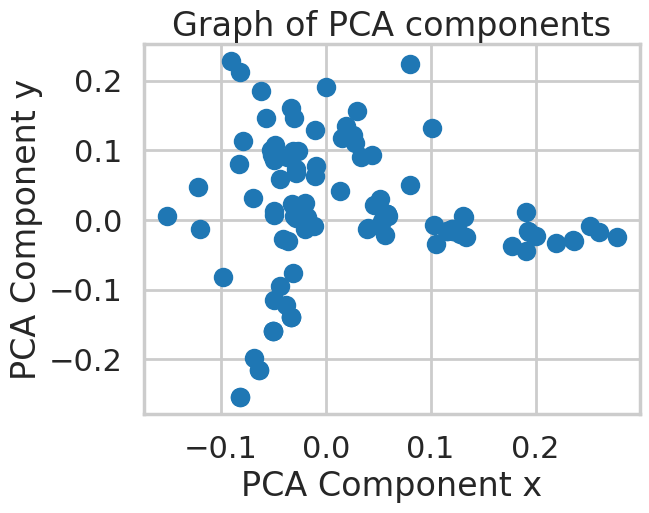

In [113]:
plt.scatter(
      model_pca_results.components_[0]
    , model_pca_results.components_[1]
)

plt.xlabel('PCA Component x')
plt.ylabel('PCA Component y')
plt.title('Graph of PCA components')
plt.show()

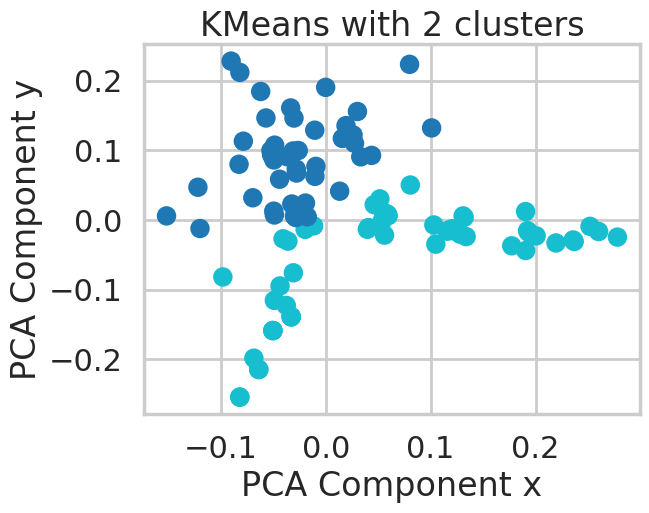

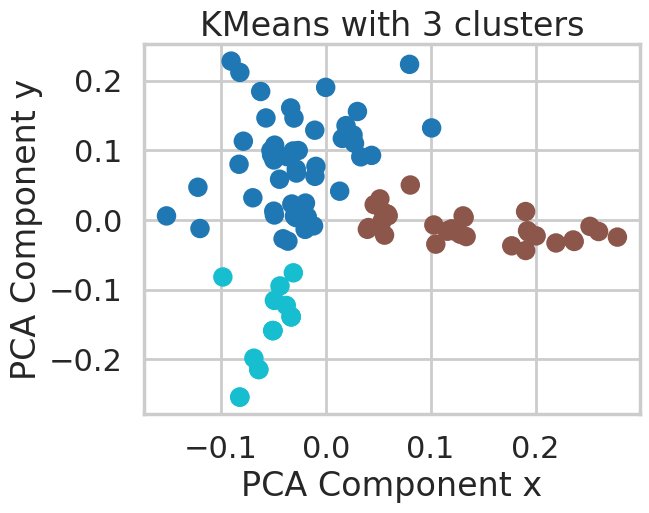

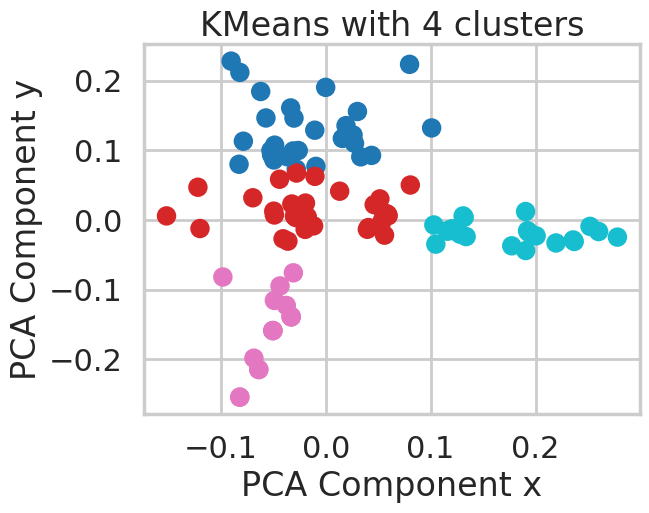

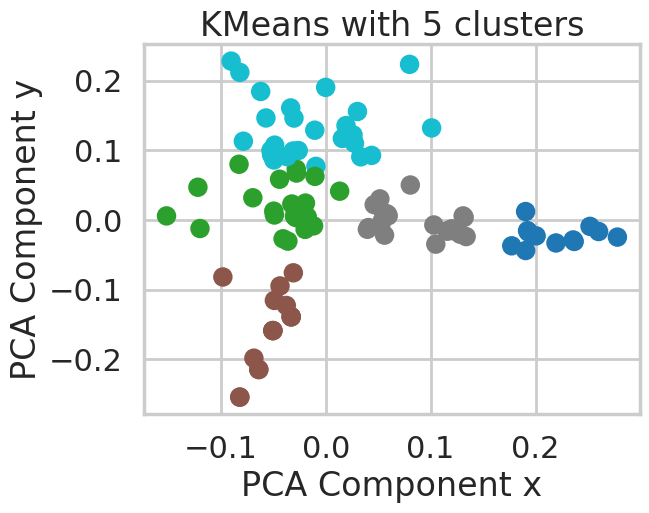

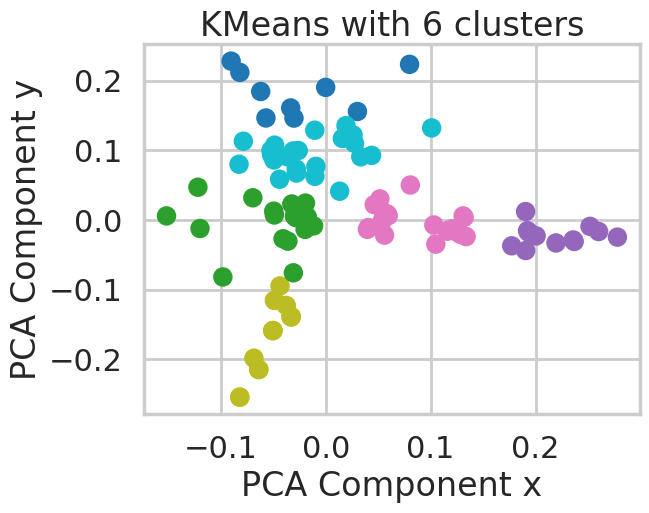

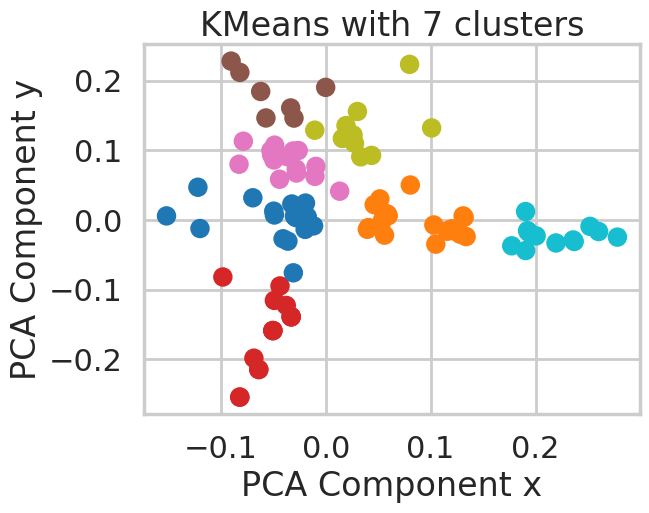

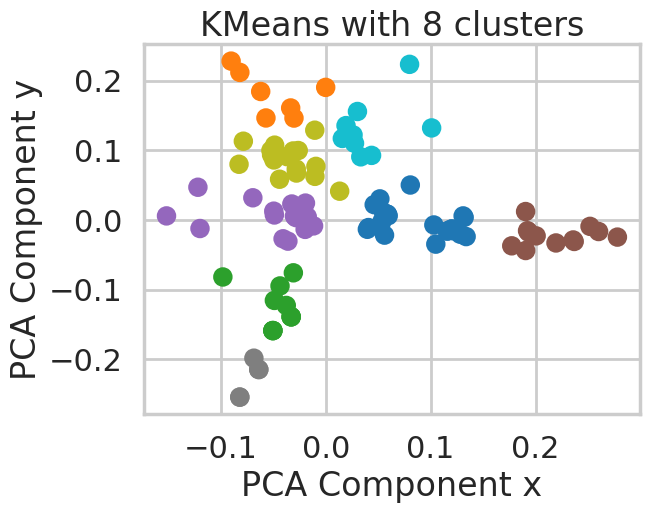

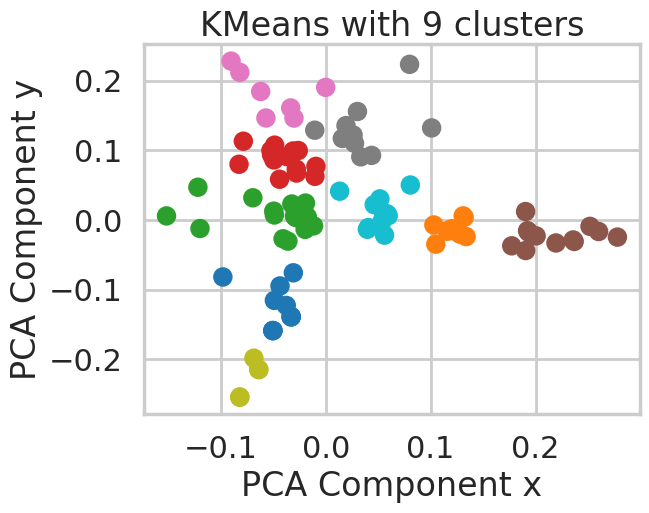

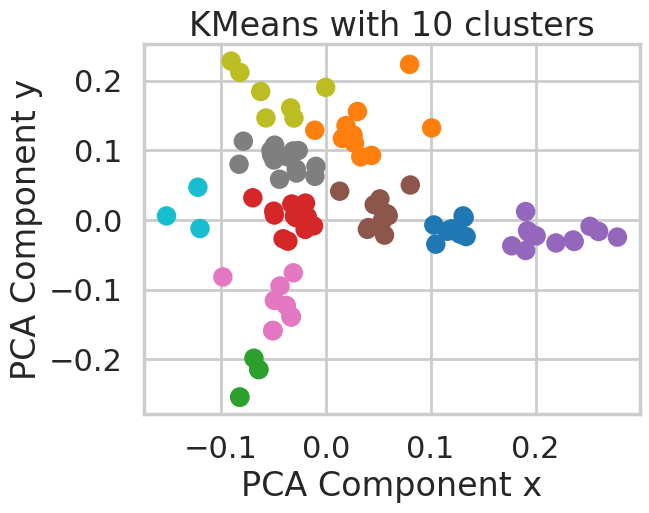

In [117]:
for k in k_values:
  model_kmeans_pca = KMeans(
        n_clusters   = k
      , n_init       = 10
      , random_state = 42
  )

  model_kmeans_pca_results = model_kmeans_pca.fit_predict(
      model_pca_results\
      .components_\
      .transpose()
  )

  plt.scatter(
        x    = model_pca_results.components_[0]
      , y    = model_pca_results.components_[1]
      , c    = model_kmeans_pca_results
      , cmap = 'tab10'
  )

  plt.xlabel('PCA Component x')
  plt.ylabel('PCA Component y')
  plt.title(f'KMeans with {k} clusters')
  plt.show()

What we've done is we've taken those columns of 0/1 indicator variables, and we've transformed them into a 2-D dataset. We took one column and arbitrarily called it `x` and then called the other `y`. Now we can throw each point into a scatterplot. We color coded each point based on it's cluster so it's easier to see them.

---

### <font color="#FF333F" size="6">$\textbf{V}$ Exercise</font>

* As we saw earlier, PCA has a lot of other uses. Since we wanted to visualize our data in 2 dimensions, restricted the number of dimensions to 2 in PCA. But what is the true optimal number of dimensions?

* <b> Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?</b>

#### $\small\textbf{1.}$ Build

In [160]:
# Initialize a new PCA model with a default number of components
pca = PCA()

#### $\small\textbf{2.}$ Fit

In [161]:
pca.fit(
    data_matrix
)

PCA()

<font size="4"><b>2.1. Explained Variance</b></font>

* Variance explained by each of the principal components (eigenvectors) of the dataset. Specifically, it is an array where each element corresponds to the amount of variance explained by the corresponding principal component.

* The values in <code><b>pca.explained_variance_</b></code> are sorted in descending order, meaning the first element in the array represents the largest amount of variance explained by the first principal component, the second element represents the variance explained by the second principal component, and so on.

* This information is important because it allows you to understand the relative importance of each principal component in capturing the overall variance in the data. Typically, you can use this information to decide how many principal components to retain for dimensionality reduction or feature extraction. If you find that the first few principal components explain most of the variance in your data, you may consider retaining only those components to reduce the dimensionality of your dataset while preserving most of the information.

In [162]:
explained_variance = pca\
                    .explained_variance_

array([0.4096489 , 0.30753551, 0.2022926 , 0.16703717, 0.15015248,
       0.1434373 , 0.13818887, 0.12192294, 0.11636172, 0.10804271,
       0.09937813, 0.09495961, 0.08690352, 0.07256738, 0.0660996 ,
       0.06245473, 0.05634388, 0.05327395, 0.04728801, 0.04393911,
       0.03900424, 0.03625783, 0.03455714, 0.03235091, 0.02940632,
       0.02618221, 0.02308167, 0.02142632, 0.018814  , 0.0165252 ,
       0.01426187, 0.0077789 ])

<font size="4"><b>2.2. Explained Variance Ratio</b></font>

* The <code><b>explained_variance_ratio_</b></code> attribute of a PCA (Principal Component Analysis) model in scikit-learn represents the ratio of variance explained by each of the selected principal components to the total variance in the data. It provides valuable information about the contribution of each principal component to the overall variance.

1. Each value in <code><b>explained_variance_ratio_</b></code> corresponds to a principal component.

2. The value at index <code><b>i</b></code> in <code><b>explained_variance_ratio_</b></code> represents the proportion of the total variance in the original data that is explained by the <code><b>i</b></code>-th principal component.

3. These values are sorted in descending order, so the first value in the array corresponds to the principal component that explains the most variance, the second value to the second most, and so on.

4. The sum of all values in <code><b>explained_variance_ratio_</b></code> should be equal to <code><b>1</b></code>, as it represents the entirety of the variance in the data.

In [167]:
explained_variance_ratio = pca\
                          .explained_variance_ratio_

array([0.14386393, 0.10800289, 0.07104281, 0.05866151, 0.05273181,
       0.05037351, 0.04853032, 0.04281792, 0.04086488, 0.03794334,
       0.03490044, 0.03334871, 0.03051951, 0.02548482, 0.02321341,
       0.02193338, 0.01978732, 0.01870919, 0.016607  , 0.0154309 ,
       0.01369783, 0.01273333, 0.01213607, 0.01136126, 0.01032716,
       0.00919489, 0.00810601, 0.00752468, 0.00660726, 0.00580346,
       0.0050086 , 0.00273186])

<font size="4"><b>2.3. Cumulative Explained Variance Ratio</b></font>

* This is an attribute of the PCA model, and it returns an array of the explained variance ratios for each of the principal components. Each element in this array represents the proportion of the total variance in the dataset that is explained by the corresponding principal component. These ratios are sorted in descending order, so the first element explains the most variance, the second explains the second most, and so on.

* So, <code><b>explained_variance_ratio_cumsum</b></code> is an array that contains the cumulative explained variance ratios. It helps you understand how much of the total variance in the data is explained by a certain number of principal components. This information is often used to decide how many principal components to retain to capture a desired amount of variance in dimensionality reduction or feature extraction tasks.

In [165]:
explained_variance_ratio_cumsum = np.cumsum(
    pca\
    .explained_variance_ratio_
)

explained_variance_ratio_cumsum

array([0.14386393, 0.25186682, 0.32290963, 0.38157114, 0.43430294,
       0.48467645, 0.53320678, 0.57602469, 0.61688958, 0.65483292,
       0.68973336, 0.72308207, 0.75360158, 0.7790864 , 0.80229981,
       0.82423318, 0.8440205 , 0.86272969, 0.87933669, 0.8947676 ,
       0.90846543, 0.92119876, 0.93333482, 0.94469609, 0.95502324,
       0.96421813, 0.97232415, 0.97984882, 0.98645608, 0.99225954,
       0.99726814, 1.        ])

#### $\small\textbf{3.}$ Visualize

<b>Using matplotlib</b>

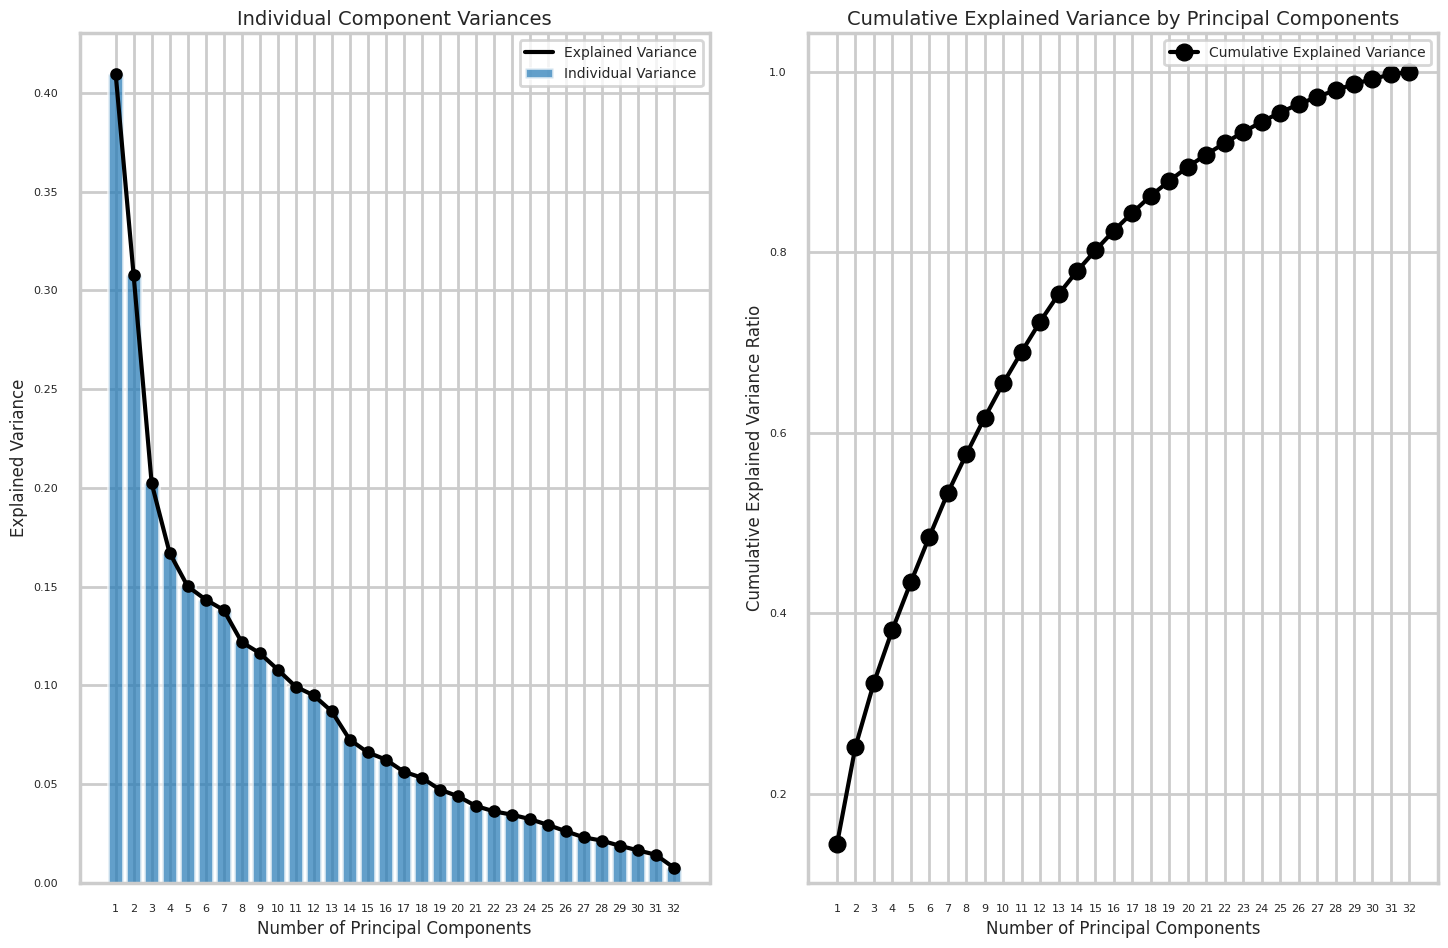

In [168]:
# Create the explained variance plot
plt.figure(
    figsize=(15, 10)
)

# Number of principal components that have been computed by the PCA model
num_pca_components = len(explained_variance)

axis_tick_values_x = range(
      1
    , num_pca_components + 1
)
# -----------------------------------------------------------------------------
# Plot individual component variances as bars
plt.subplot(1, 2, 1)

plt.bar(
      axis_tick_values_x
    , explained_variance
    , alpha = 0.7
    , label = 'Individual Variance'
)

# Calculate the centers of the bars
bar_centers = [
    (i+1, explained_variance[i])
    for i
    in range(num_pca_components)
]

# Plot circle symbol at the centers of the bars
plt.scatter(
      *zip(*bar_centers)
    , c      = 'black'
    , s      = 50
    , marker = 'o'
)

# Connect the centers with a curve
plt.plot(
      *zip(*bar_centers)
    , linestyle = '-'
    , color     = 'black'
    , label     = 'Explained Variance'
)


plt.xticks(
      axis_tick_values_x
    , fontsize = 8
)

plt.yticks(
    fontsize = 8
)

plt.xlabel(
      'Number of Principal Components'
    , fontsize = 12
)

plt.ylabel(
      'Explained Variance'
    , fontsize = 12
)

plt.title(
      'Individual Component Variances'
    , fontsize = 14
)

plt.grid(
    True
)

plt.legend(
    fontsize = 10
)
# -----------------------------------------------------------------------------
# Plot cumulative explained variance
plt.subplot(1, 2, 2)

plt.plot(
      axis_tick_values_x
    , explained_variance_ratio_cumsum
    , marker    = 'o'
    , c         = 'black'
    , linestyle = '-'
    , label     = 'Cumulative Explained Variance'
)

plt.xticks(
      axis_tick_values_x
    , fontsize = 8
)

plt.yticks(
    fontsize = 8
)

plt.xlabel(
      'Number of Principal Components'
    , fontsize = 12
)

plt.ylabel(
      'Cumulative Explained Variance Ratio'
    , fontsize = 12
)

plt.title(
      'Cumulative Explained Variance by Principal Components'
    , fontsize = 14
)

plt.grid(
    True
)

plt.legend(
    fontsize = 10
)
# -----------------------------------------------------------------------------
plt.tight_layout()
plt.show()

As can be seen from left plot, the Explained Variance starts to slow down at <code><b>n_components = 3</b></code>, hence, the point can be selected as the Elbow Point. As a result, PCA with $3$ components might be the optimal dimension for this dataset.

---

# 4. Conclusions and next steps

## 4.1. Conclusions
What can you conclude from your investigations? Make a note, formulate it as clearly as possible, and be prepared to discuss it with your mentor in your next call.

## 4.2. Other clustering algorithms

k-means is only one of a ton of clustering algorithms. Below is a brief description of several clustering algorithms, and the table provides references to the other clustering algorithms in scikit-learn.

* **Affinity Propagation** does not require the number of clusters $K$ to be known in advance! AP uses a "message passing" paradigm to cluster points based on their similarity.

* **Spectral Clustering** uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in a lower dimensional space. This is tangentially similar to what we did to visualize k-means clusters using PCA. The number of clusters must be known a priori.

* **Ward's Method** applies to hierarchical clustering. Hierarchical clustering algorithms take a set of data and successively divide the observations into more and more clusters at each layer of the hierarchy. Ward's method is used to determine when two clusters in the hierarchy should be combined into one. It is basically an extension of hierarchical clustering. Hierarchical clustering is *divisive*, that is, all observations are part of the same cluster at first, and at each successive iteration, the clusters are made smaller and smaller. With hierarchical clustering, a hierarchy is constructed, and there is not really the concept of "number of clusters." The number of clusters simply determines how low or how high in the hierarchy we reference and can be determined empirically or by looking at the [dendogram](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

* **Agglomerative Clustering** is similar to hierarchical clustering but but is not divisive, it is *agglomerative*. That is, every observation is placed into its own cluster and at each iteration or level or the hierarchy, observations are merged into fewer and fewer clusters until convergence. Similar to hierarchical clustering, the constructed hierarchy contains all possible numbers of clusters and it is up to the analyst to pick the number by reviewing statistics or the dendogram.

* **DBSCAN** is based on point density rather than distance. It groups together points with many nearby neighbors. DBSCAN is one of the most cited algorithms in the literature. It does not require knowing the number of clusters a priori, but does require specifying the neighborhood size.

Clustering Algorithms in Scikit-learn:

<table border="1">
<colgroup>
<col width="15%" />
<col width="16%" />
<col width="20%" />
<col width="27%" />
<col width="22%" />
</colgroup>
<thead valign="bottom">
<tr><th>Method name</th>
<th>Parameters</th>
<th>Scalability</th>
<th>Use Case</th>
<th>Geometry (metric used)</th>
</tr>
</thead>
<tbody valign="top">
<tr><td>K-Means</span></a></td>
<td>number of clusters</td>
<td>Very large<span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span> with
MiniBatch code</td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
</tr>
<tr><td>Affinity propagation</td>
<td>damping, sample preference</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Mean-shift</td>
<td>bandwidth</td>
<td>Not scalable with <span class="pre">n_samples</span></td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Distances between points</td>
</tr>
<tr><td>Spectral clustering</td>
<td>number of clusters</td>
<td>Medium <span class="pre">n_samples</span>, small <span class="pre">n_clusters</span></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Ward hierarchical clustering</td>
<td>number of clusters</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
</tr>
<tr><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
</tr>
<tr><td>DBSCAN</td>
<td>neighborhood size</td>
<td>Very large <span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
</tr>
<tr><td>Gaussian mixtures</td>
<td>many</td>
<td>Not scalable</td>
<td>Flat geometry, good for density estimation</td>
<td>Mahalanobis distances to  centers</td>
</tr>
<tr><td>Birch</td>
<td>branching factor, threshold, optional global clusterer.</td>
<td>Large <span class="pre">n_clusters</span> and <span class="pre">n_samples</span></td>
<td>Large dataset, outlier removal, data reduction.</td>
<td>Euclidean distance between points</td>
</tr>
</tbody>
</table>
Source: http://scikit-learn.org/stable/modules/clustering.html

---

### <font color="#FF333F" size="6">$\textbf{VI}$ Exercise</font>

Try clustering using the following algorithms.

* Affinity propagation
* Spectral clustering
* Agglomerative clustering
* DBSCAN

How do their results compare? Which performs the best? Tell a story why you think it performs the best.

#### $\small\textbf{I. Affinity Propagation}$

In [170]:
from sklearn.cluster import AffinityPropagation

#### $\small\textbf{1.}$ Build

In [188]:
ap = AffinityPropagation(
      damping      = 0.5
    , random_state = 42
)

#### $\small\textbf{2.}$ Fit

In [189]:
ap.fit(
    data_matrix
)

AffinityPropagation(random_state=42)

#### $\small\textbf{3.}$ Predict

In [190]:
labels = ap.predict(
    data_matrix
)

labels

array([ 0, 10,  8,  3,  3, 12,  8,  6,  4,  2,  9, 13,  2, 12,  4,  8,  3,
        8,  0,  1,  2,  6,  4,  9,  8, 10, 11,  4, 10, 13,  3,  6,  4,  7,
        0,  5,  4,  2,  4,  5,  8,  8,  6, 12,  0,  7,  2,  3, 10,  4,  1,
       12, 13,  8,  3,  6,  8,  3,  0,  6, 12,  6, 12,  0,  0, 13,  8, 11,
        9, 10, 11, 10,  7,  3, 12,  3, 13,  3,  0, 13, 11, 10, 11, 13,  2,
        5,  0, 10, 10,  6,  7,  0,  3,  3,  1, 12,  6, 12,  7, 10])

#### $\small\textbf{4.}$ Visualize

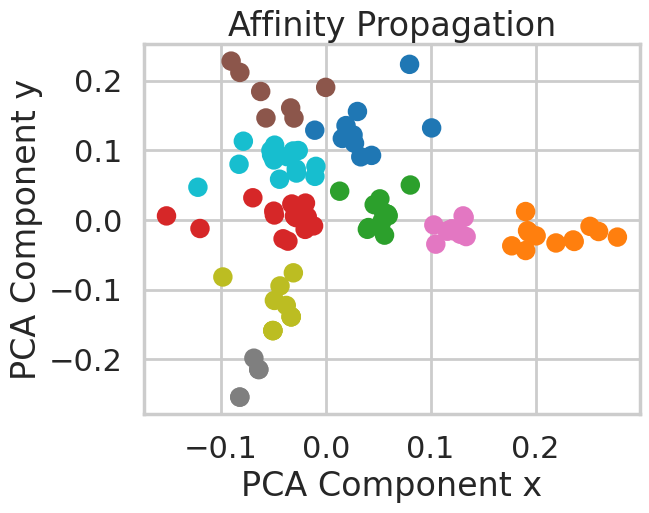

In [208]:
plot_clustering_algorithm(
      ap
    ,"Affinity Propagation"
)

#### $\small\textbf{5.}$ Conclusions

In [179]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

The Affinity Propagation algorithm divides the data into 14 clusters when the damping parameter is set to 0.5. However, with a higher damping value of 0.97, the number of clusters decreases to 11. This is still significantly greater than the number of clusters obtained using the KMeans algorithm.

#### $\small\textbf{II. Spectural Clustering}$

In [183]:
from sklearn.cluster import SpectralClustering

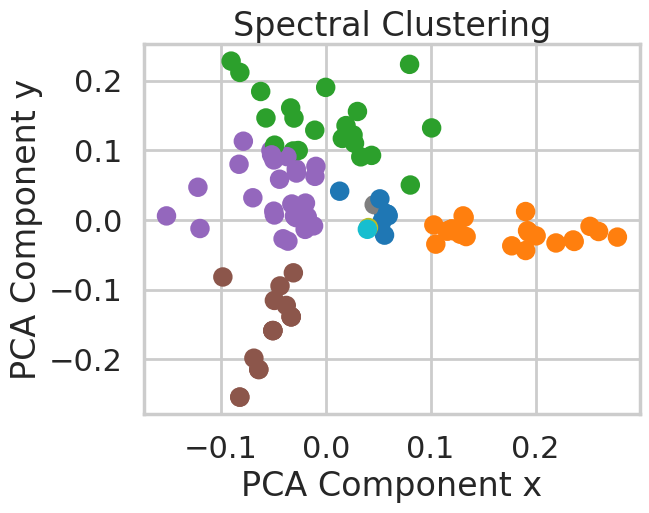

In [210]:
spectral = SpectralClustering(
    random_state=42
)

plot_clustering_algorithm(
      spectral
    , "Spectral Clustering"
)

#### $\small\textbf{III. Hierarchical Agglomerative Clustering}$

In [202]:
from sklearn.cluster import AgglomerativeClustering

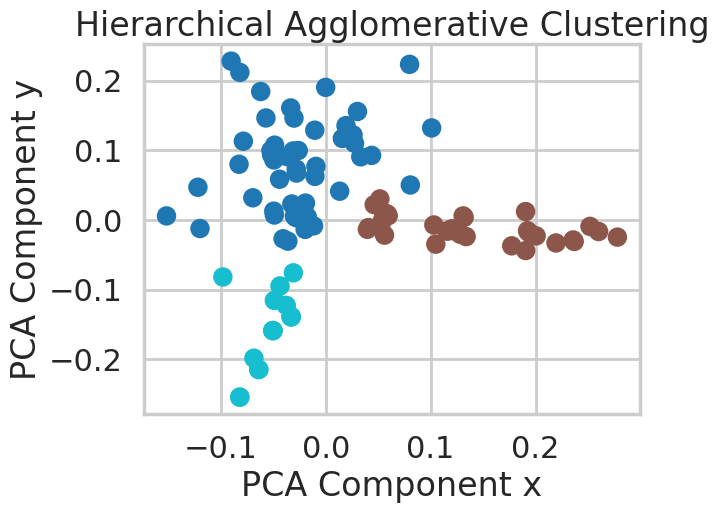

In [211]:
hac = AgglomerativeClustering(
    n_clusters=3
)

plot_clustering_algorithm(
      hac
    , 'Hierarchical Agglomerative Clustering'
)

#### $\small\textbf{IV. DBSCAN}$

In [204]:
from sklearn.cluster import DBSCAN

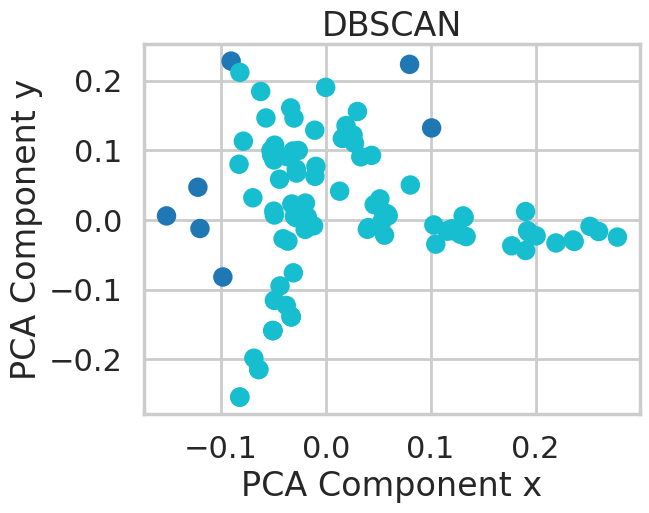

In [212]:
dbscan = DBSCAN(
    .05
)

plot_clustering_algorithm(
      dbscan
    , 'DBSCAN'
)

---